In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import seaborn as sns
from matplotlib import pyplot
import folium
import json
import os

import platform
from matplotlib import font_manager, rc

import warnings
warnings.filterwarnings('ignore')

In [2]:
plt.rcParams['axes.unicode_minus'] = False
if platform.system() == 'Darwin':
    rc('font', family = 'AppleGothic')
elif platform.system() == 'Windows':
    path ='C:/Windows/Fonts/malgun.ttf'
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print("Can't find your system.")

In [3]:
with open('C:/Users/mmqq2/Kdigital/05. 공모전/Sejong_Si/Data/32.세종시_행정경계(읍면동).geojson',mode='rt',encoding='utf-8') as f:
    geo = json.loads(f.read())
    f.close()

In [4]:
df = pd.read_csv('C:/Users/mmqq2/Kdigital/05. 공모전/Sejong_Si/Data/22.세종시_연령별_인구현황.csv', index_col='읍면동') 
# df.head()

In [5]:
df = df.transpose()

In [6]:
df_2017 = df[0:312]
df_2018 = df[312:624]
df_2019 = df[624:936]
df_2020 = df[936:1248]
# 성별별 총 거주자수로 분리

In [7]:
df_2017.reset_index(inplace=True)
df_2018.reset_index(inplace=True)
df_2019.reset_index(inplace=True)
df_2020.reset_index(inplace=True)

In [8]:
df_2017.columns = ['month','세종특별자치시', '조치원읍', '연기면', '연동면', '부강면', '금남면', '장군면', '연서면', '전의면',
       '전동면', '소정면', '한솔동', '새롬동', '도담동', '아름동', '종촌동', '고운동', '소담동', '보람동',
       '대평동', '다정동']
df_2018.columns = ['month','세종특별자치시', '조치원읍', '연기면', '연동면', '부강면', '금남면', '장군면', '연서면', '전의면',
       '전동면', '소정면', '한솔동', '새롬동', '도담동', '아름동', '종촌동', '고운동', '소담동', '보람동',
       '대평동', '다정동']
df_2019.columns = ['month','세종특별자치시', '조치원읍', '연기면', '연동면', '부강면', '금남면', '장군면', '연서면', '전의면',
       '전동면', '소정면', '한솔동', '새롬동', '도담동', '아름동', '종촌동', '고운동', '소담동', '보람동',
       '대평동', '다정동']
df_2020.columns = ['month','세종특별자치시', '조치원읍', '연기면', '연동면', '부강면', '금남면', '장군면', '연서면', '전의면',
       '전동면', '소정면', '한솔동', '새롬동', '도담동', '아름동', '종촌동', '고운동', '소담동', '보람동',
       '대평동', '다정동']

In [44]:
df_2017_m = pd.DataFrame()
df_2017_w = pd.DataFrame()

for i in range(0,12):
    df_2017_m = pd.concat([df_2017_m, df_2017.loc[i*26 : i*26+12]],axis=0)
    df_2017_w = pd.concat([df_2017_w, df_2017.loc[i*26+13 : i*26+25]],axis=0)
    df_2017_m = df_2017_m.drop(df_2017_m.index[i*11 : i*11+2]).reset_index(drop=True)
    df_2017_w = df_2017_w.drop(df_2017_w.index[i*11 : i*11+2]).reset_index(drop=True)

In [45]:
df_2017_m_y = pd.DataFrame()
df_2017_w_y = pd.DataFrame()
temp1 = pd.DataFrame()
temp2 = pd.DataFrame()

for i in range(0,11):
    for j in range(0,12):
        temp1 = pd.concat([temp1,df_2017_m.loc[[j*11+i]]],axis=0)
        temp2 = pd.concat([temp2,df_2017_w.loc[[j*11+i]]],axis=0)
        
    df_2017_m_y = pd.concat([df_2017_m_y,pd.DataFrame(temp1[i*12:i*12+12].mean()).transpose()],axis=0)    
    df_2017_w_y = pd.concat([df_2017_w_y,pd.DataFrame(temp2[i*12:i*12+12].mean()).transpose()],axis=0)    
    
df_2017_m_y.index = list(range(0,110,10))
df_2017_w_y.index = list(range(0,110,10))

In [46]:
df_2017_m_y

세종특별자치시         조치원읍         연기면         연동면         부강면  \
0    19330.750000  2401.416667   60.750000   78.916667  227.000000   
10   15117.000000  2447.750000   85.833333  109.583333  266.416667   
20   14333.750000  3467.250000  218.250000  204.750000  463.083333   
30   23884.583333  3609.083333  189.166667  227.166667  492.166667   
40   25568.666667  4088.250000  266.000000  243.500000  568.666667   
50   16310.916667  3396.416667  294.833333  362.916667  655.083333   
60    9602.916667  2195.250000  206.416667  324.083333  404.166667   
70    4858.333333  1237.833333  113.166667  162.500000  298.083333   
80    1772.833333   406.416667   43.000000   85.166667  121.750000   
90     144.416667    38.750000    5.583333    5.416667    8.750000   
100      0.000000     0.000000    0.000000    0.000000    0.000000   

             금남면         장군면         연서면         전의면         전동면  ...  \
0     250.833333  130.250000  234.500000  186.750000   66.000000  ...   
10    273.666667  196.666667  305.833333  277.166667   94.250000  ...   
20    600.166667  548.666667  530.166667  398.583333  236.166667  ...   
30    602.416667  548.500000  528.500000  380.000000  219.750000  ...   
40    738.583333  580.750000  622.333333  519.916667  283.416667  ...   
50   1015.250000  645.333333  759.250000  636.250000  482.750000  ...   
60    828.250000  465.166667  646.000000  440.916667  396.000000  ...   
70    451.500000  255.583333  383.333333  290.083333  231.416667  ...   
80    188.833333  116.250000  180.916667  145.083333   93.750000  ...   
90     16.750000    5.000000    7.750000    9.666667    5.833333  ...   
100     0.000000    0.000000    0.000000    0.000000    0.000000  ...   

             한솔동         새롬동          도담동          아름동          종촌동  \
0    2477.583333  461.666667  2677.166667  2651.416667  2861.166667   
10   2155.166667  304.750000  2035.333333  2113.583333  1889.083333   
20   1359.416667  336.750000  1585.833333   952.916667  1297.166667   
30   2471.750000  643.000000  3148.666667  2401.000000  3220.750000   
40   3206.416667  518.333333  3291.666667  3130.916667  3087.666667   
50   1453.000000  280.416667  1620.750000  1143.500000  1348.916667   
60    540.000000  121.583333   698.583333   481.833333   642.083333   
70    214.000000   30.583333   319.833333   150.166667   290.916667   
80     59.583333    9.833333    96.750000    46.166667    67.500000   
90      6.916667    1.166667    14.083333     5.333333     3.583333   
100     0.000000    0.000000     0.000000     0.000000     0.000000   

             고운동  소담동          보람동  대평동  다정동  
0    2542.333333  0.0  1938.000000  0.0  0.0  
10   1383.833333  0.0  1052.666667  0.0  0.0  
20    935.916667  0.0  1011.666667  0.0  0.0  
30   2799.083333  0.0  2237.166667  0.0  0.0  
40   2346.750000  0.0  1808.083333  0.0  0.0  
50    921.916667  0.0  1026.583333  0.0  0.0  
60    573.333333  0.0   451.916667  0.0  0.0  
70    192.250000  0.0   119.583333  0.0  0.0  
80     43.666667  0.0    21.583333  0.0  0.0  
90      2.333333  0.0     1.833333  0.0  0.0  
100     0.000000  0.0     0.000000  0.0  0.0  

[11 rows x 21 columns]

In [47]:
df_2018_m = pd.DataFrame()
df_2018_w = pd.DataFrame()

for i in range(0,12):
    df_2018_m = pd.concat([df_2018_m, df_2018.loc[i*26 : i*26+12]],axis=0)
    df_2018_w = pd.concat([df_2018_w, df_2018.loc[i*26+13 : i*26+25]],axis=0)
    df_2018_m = df_2018_m.drop(df_2018_m.index[i*11 : i*11+2]).reset_index(drop=True)
    df_2018_w = df_2018_w.drop(df_2018_w.index[i*11 : i*11+2]).reset_index(drop=True)

In [48]:
df_2018_m_y = pd.DataFrame()
df_2018_w_y = pd.DataFrame()
temp1 = pd.DataFrame()
temp2 = pd.DataFrame()

for i in range(0,11):
    for j in range(0,12):
        temp1 = pd.concat([temp1,df_2018_m.loc[[j*11+i]]],axis=0)
        temp2 = pd.concat([temp2,df_2018_w.loc[[j*11+i]]],axis=0)
        
    df_2018_m_y = pd.concat([df_2018_m_y,pd.DataFrame(temp1[i*12:i*12+12].mean()).transpose()],axis=0)    
    df_2018_w_y = pd.concat([df_2018_w_y,pd.DataFrame(temp2[i*12:i*12+12].mean()).transpose()],axis=0)    
    
df_2018_m_y.index = list(range(0,110,10))
df_2018_w_y.index = list(range(0,110,10))

In [49]:
df_2019_m = pd.DataFrame()
df_2019_w = pd.DataFrame()

for i in range(0,12):
    df_2019_m = pd.concat([df_2019_m, df_2019.loc[i*26 : i*26+12]],axis=0)
    df_2019_w = pd.concat([df_2019_w, df_2019.loc[i*26+13 : i*26+25]],axis=0)
    df_2019_m = df_2019_m.drop(df_2019_m.index[i*11 : i*11+2]).reset_index(drop=True)
    df_2019_w = df_2019_w.drop(df_2019_w.index[i*11 : i*11+2]).reset_index(drop=True)

In [50]:
df_2019_m_y = pd.DataFrame()
df_2019_w_y = pd.DataFrame()
temp1 = pd.DataFrame()
temp2 = pd.DataFrame()

for i in range(0,11):
    for j in range(0,12):
        temp1 = pd.concat([temp1,df_2019_m.loc[[j*11+i]]],axis=0)
        temp2 = pd.concat([temp2,df_2019_w.loc[[j*11+i]]],axis=0)
        
    df_2019_m_y = pd.concat([df_2019_m_y,pd.DataFrame(temp1[i*12:i*12+12].mean()).transpose()],axis=0)    
    df_2019_w_y = pd.concat([df_2019_w_y,pd.DataFrame(temp2[i*12:i*12+12].mean()).transpose()],axis=0)    
    
df_2019_m_y.index = list(range(0,110,10))
df_2019_w_y.index = list(range(0,110,10))

In [51]:
df_2020_m = pd.DataFrame()
df_2020_w = pd.DataFrame()

for i in range(0,12):
    df_2020_m = pd.concat([df_2020_m, df_2020.loc[i*26 : i*26+12]],axis=0)
    df_2020_w = pd.concat([df_2020_w, df_2020.loc[i*26+13 : i*26+25]],axis=0)
    df_2020_m = df_2020_m.drop(df_2020_m.index[i*11 : i*11+2]).reset_index(drop=True)
    df_2020_w = df_2020_w.drop(df_2020_w.index[i*11 : i*11+2]).reset_index(drop=True)

In [52]:
df_2020_m_y = pd.DataFrame()
df_2020_w_y = pd.DataFrame()
temp1 = pd.DataFrame()
temp2 = pd.DataFrame()

for i in range(0,11):
    for j in range(0,12):
        temp1 = pd.concat([temp1,df_2020_m.loc[[j*11+i]]],axis=0)
        temp2 = pd.concat([temp2,df_2020_w.loc[[j*11+i]]],axis=0)
        
    df_2020_m_y = pd.concat([df_2020_m_y,pd.DataFrame(temp1[i*12:i*12+12].mean()).transpose()],axis=0)    
    df_2020_w_y = pd.concat([df_2020_w_y,pd.DataFrame(temp2[i*12:i*12+12].mean()).transpose()],axis=0)    
    
df_2020_m_y.index = list(range(0,110,10))
df_2020_w_y.index = list(range(0,110,10))

In [53]:
df_m = pd.DataFrame()
df_w = pd.DataFrame()
m_list = [df_2017_m_y,df_2018_m_y,df_2019_m_y,df_2020_m_y]
w_list = [df_2017_w_y,df_2018_w_y,df_2019_w_y,df_2020_w_y]

for i in range(0,4):
    df_m = pd.concat([df_m,pd.DataFrame(m_list[i].sum()).transpose()],axis=0)
    df_w = pd.concat([df_w,pd.DataFrame(w_list[i].sum()).transpose()],axis=0)
    
df_m = df_m.reset_index()
df_w = df_w.reset_index()

df_m['index'] = range(2017,2021)
df_w['index'] = range(2017,2021)

In [28]:
df_m

index        세종특별자치시          조치원읍          연기면          연동면          부강면  \
0   2017  183106.613736  29988.452763  1559.286006  1816.588922  3922.581938   
1   2018  209231.205029  28776.066763  1551.641017  1660.238080  3766.419405   
2   2019  227763.884909  27684.344986  1472.331400  1540.893179  3753.945250   
3   2020  238182.904606  26756.949489  1421.446699  1484.154281  3608.858204   

           금남면          장군면          연서면          전의면  ...           한솔동  \
0  5101.754455  3704.812918  4488.799348  3556.843651  ...  21325.737548   
1  4763.185687  3559.730210  4373.419141  3362.131154  ...  14528.063113   
2  4506.421368  3500.905038  4207.796651  3119.544153  ...  14143.949591   
3  4301.662608  3651.930928  3997.205877  2966.015602  ...  13934.725743   

            새롬동           도담동           아름동           종촌동           고운동  \
0   4062.021901  23185.278000  20701.491721  22645.663591  18515.747382   
1  28168.990392  23120.057943  18595.321877  22308.091589  20799.459885   
2  36159.870130  22670.214430  18058.086595  21770.060116  24453.732278   
3  31814.559383  23575.379323  17797.370611  21532.438865  25376.847400   

            소담동           보람동          대평동          다정동  
0      0.000000  14935.829401     0.000000     0.000000  
1   6426.135357  17903.878154  2169.677802     0.000000  
2  17263.549233  12988.534614  7259.247920     0.000000  
3  22943.301293  14234.197571  7685.341270  8115.194384  

[4 rows x 22 columns]

In [29]:
df_w

index        세종특별자치시          조치원읍          연기면          연동면          부강면  \
0   2017  179336.130631  27812.835540  1173.194231  1576.707789  3215.699615   
1   2018  205497.928848  26469.468290  1096.395019  1430.976990  2980.142557   
2   2019  223807.613149  25013.743191  1019.521260  1325.035444  2887.271955   
3   2020  234227.336132  24060.028217  1022.244995  1246.410456  2715.719475   

           금남면          장군면          연서면          전의면  ...           한솔동  \
0  4293.449080  2871.403352  3705.459217  3058.575899  ...  21921.678448   
1  4065.531211  2714.177522  3527.408261  2864.594592  ...  14743.607843   
2  3752.291074  2633.726602  3387.458784  2622.895049  ...  14236.937392   
3  3598.972376  2625.477826  3201.177008  2398.982678  ...  13992.223088   

            새롬동           도담동           아름동           종촌동           고운동  \
0   4238.595881  24084.438739  20766.136875  23733.062728  18771.937527   
1  29247.921913  23918.279615  18462.885513  23187.564505  21149.755333   
2  37570.871399  23521.115984  17997.471940  22517.891348  24914.152477   
3  33178.589382  24413.800980  17612.612425  22208.681953  25849.534416   

            소담동           보람동          대평동          다정동  
0      0.000000  15181.535221     0.000000     0.000000  
1   6504.269844  18233.672643  2137.693257     0.000000  
2  17468.228256  13167.973151  7164.162852     0.000000  
3  23261.867881  14431.023286  7536.025797  8459.816835  

[4 rows x 22 columns]

In [19]:
df

읍면동                 세종특별자치시   조치원읍   연기면   연동면   부강면   금남면   장군면   연서면   전의면  \
201701_남자(총_거주자_수)   121937  23529  1463  1828  3554  5033  3427  4182  3312   
201701_남자(연령구간인구수)   121937  23529  1463  1828  3554  5033  3427  4182  3312   
201701_남자(0~9세)       17864   2525    56    87   235   263   132   222   194   
201701_남자(10~19세)     13917   2473    93   123   287   287   199   328   285   
201701_남자(20~29세)     13463   3461   220   210   472   616   540   532   403   
...                     ...    ...   ...   ...   ...   ...   ...   ...   ...   
202012_여자(60~69세)     15113   2676   221   307   511   836   514   657   453   
202012_여자(70~79세)      7736   1725   138   224   353   606   302   517   377   
202012_여자(80~89세)      4672    930   102   212   251   437   244   338   300   
202012_여자(90~99세)       915    162    23    45    32    91    38    54    60   
202012_여자(100세_이상)       22      7     1     0     1     2     1     2     1   

읍면동                  전동면  ...    한솔동  새롬동    도담동    아름동    종촌동   고운동  소담동  \
201701_남자(총_거주자_수)  2124  ...  17376    0  15108  24906  14631     0    0   
201701_남자(연령구간인구수)  2124  ...  17376    0  15108  24906  14631     0    0   
201701_남자(0~9세)       67  ...   3185    0   2633   5273   2903     0    0   
201701_남자(10~19세)     97  ...   2466    0   1930   3370   1853     0    0   
201701_남자(20~29세)    245  ...   1760    0   1569   1963   1282     0    0   
...                  ...  ...    ...  ...    ...    ...    ...   ...  ...   
202012_여자(60~69세)    374  ...    607  839   1190    613   1049  1240  901   
202012_여자(70~79세)    259  ...    271  281    550    237    432   429  308   
202012_여자(80~89세)    208  ...    136  139    322    107    225   145  143   
202012_여자(90~99세)     41  ...     26   40     69     27     30    37   42   
202012_여자(100세_이상)     2  ...      2    0      0      0      0     0    3   

읍면동                 보람동  대평동  다정동  
201701_남자(총_거주자_수)    0    0    0  
201701_남자(연령구간인구수)    0    0    0  
201701_남자(0~9세)       0    0    0  
201701_남자(10~19세)     0    0    0  
201701_남자(20~29세)     0    0    0  
...                 ...  ...  ...  
202012_여자(60~69세)   672  418  845  
202012_여자(70~79세)   220  114  243  
202012_여자(80~89세)   109   80  114  
202012_여자(90~99세)    28   24   28  
202012_여자(100세_이상)    0    0    0  

[1248 rows x 21 columns]

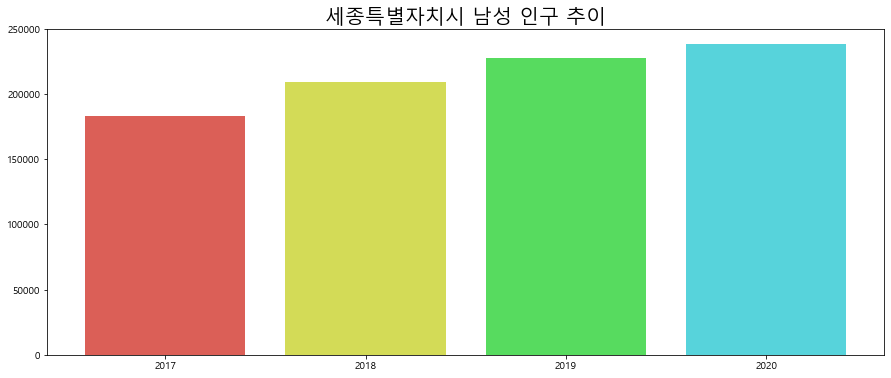

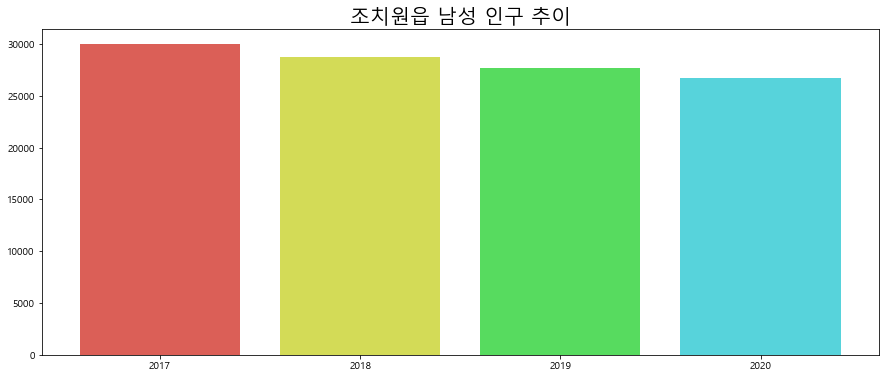

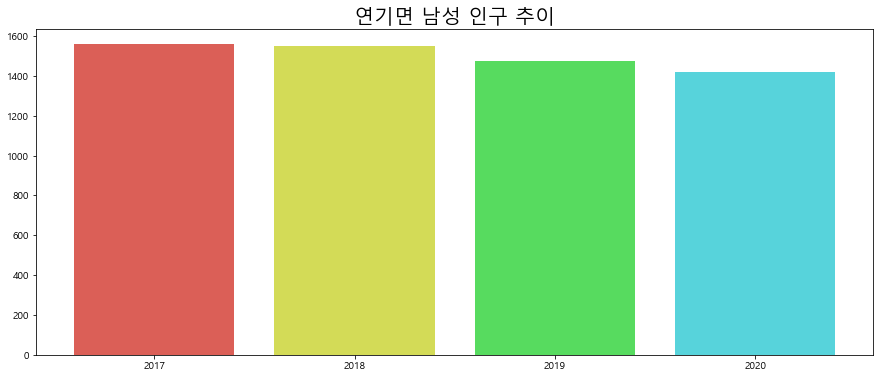

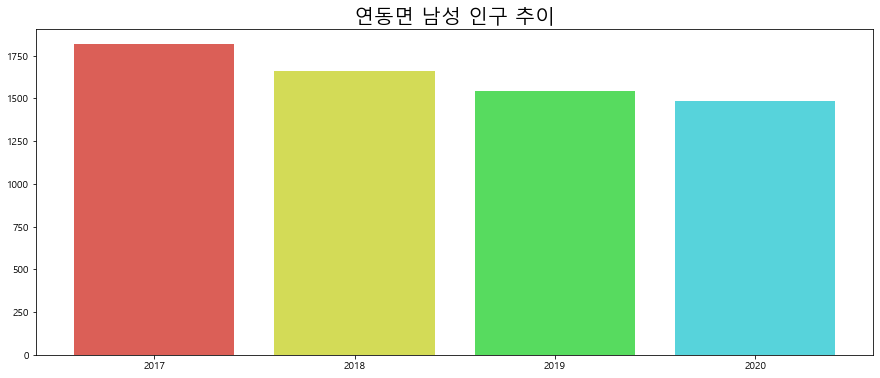

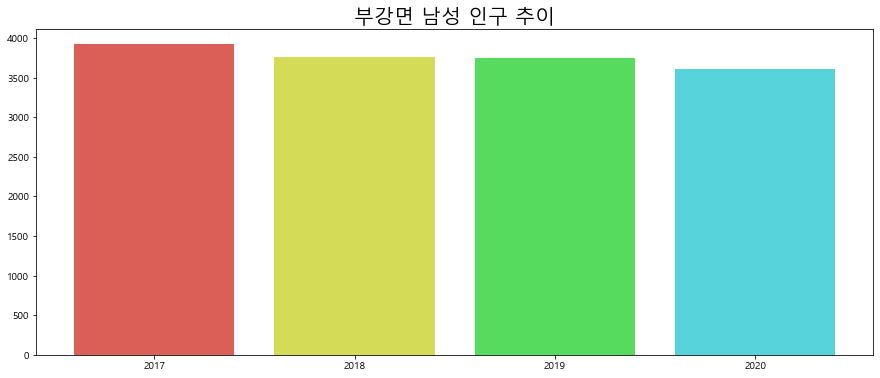

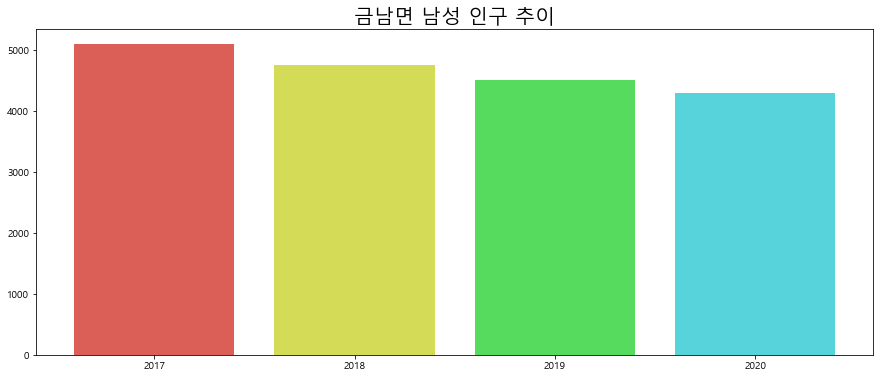

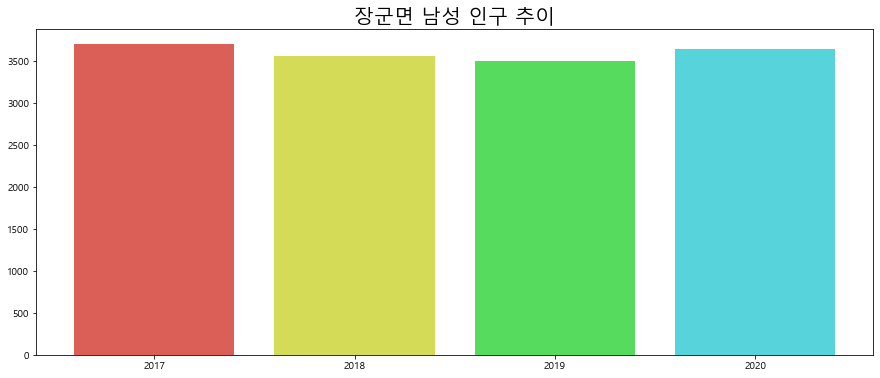

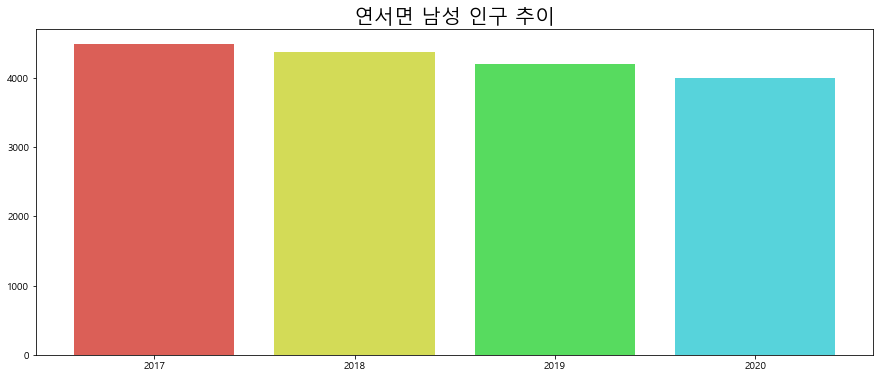

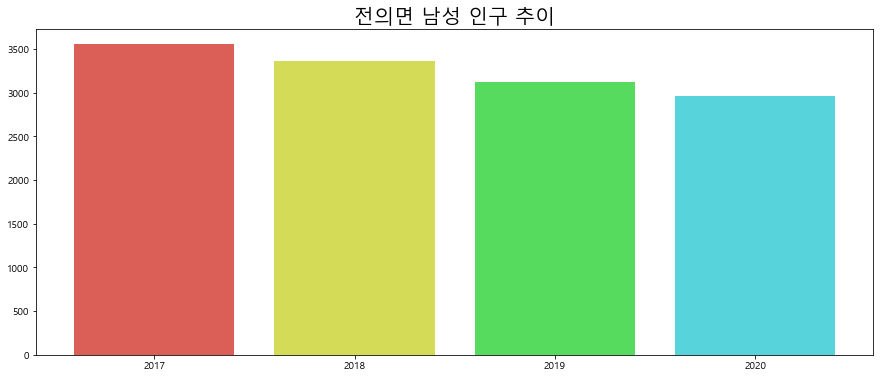

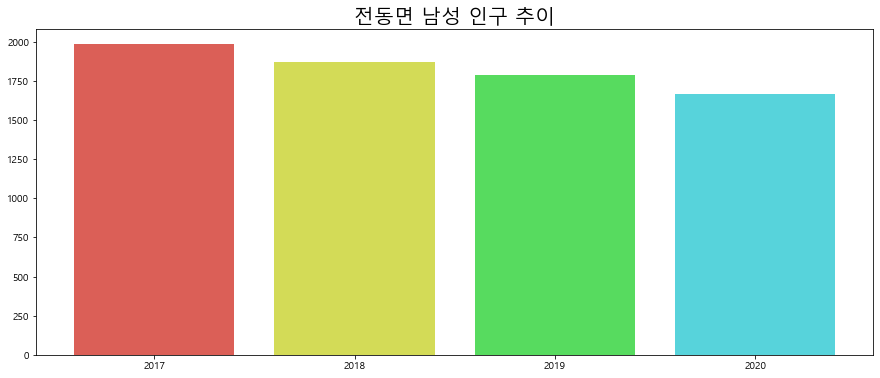

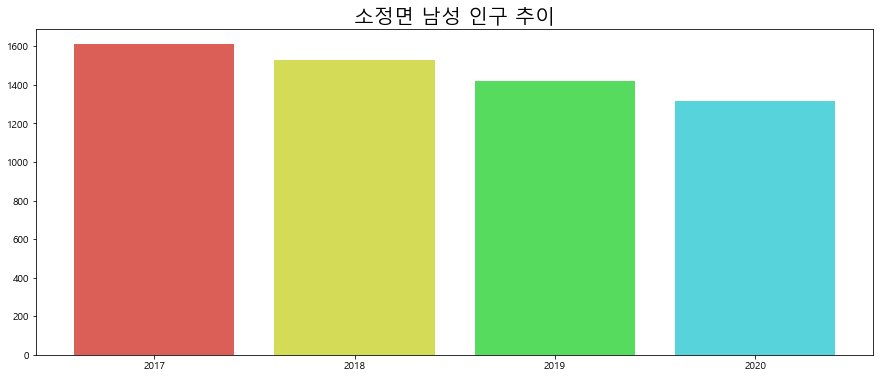

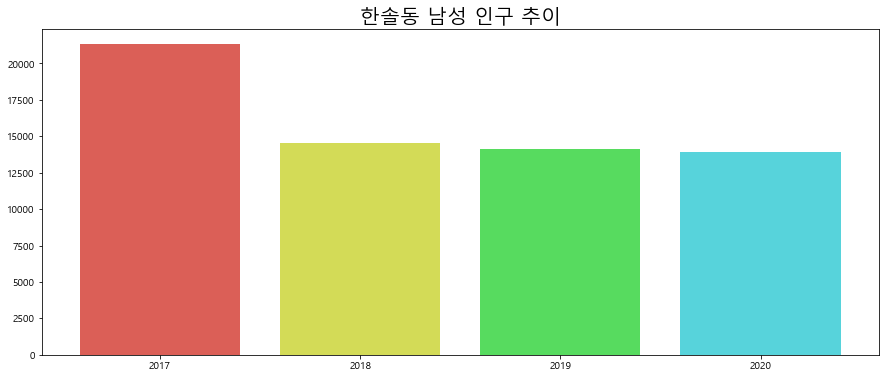

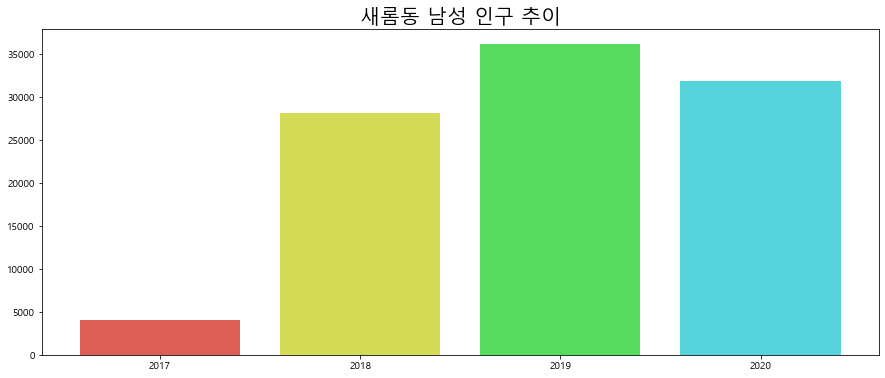

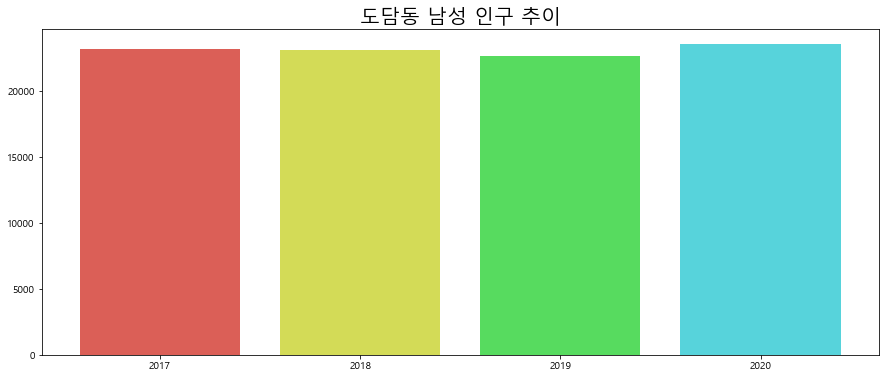

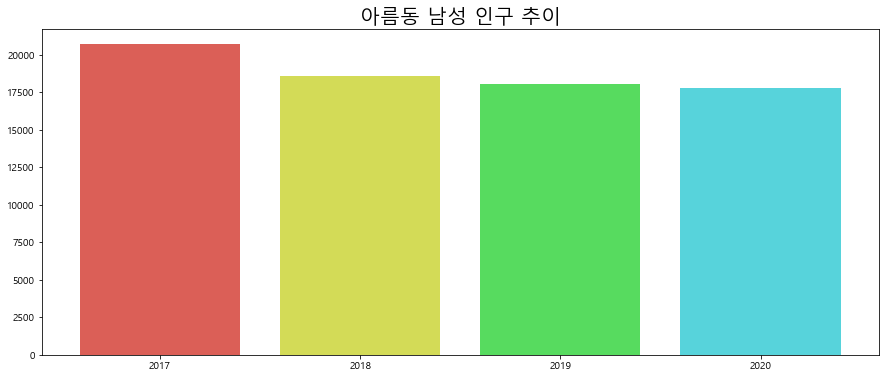

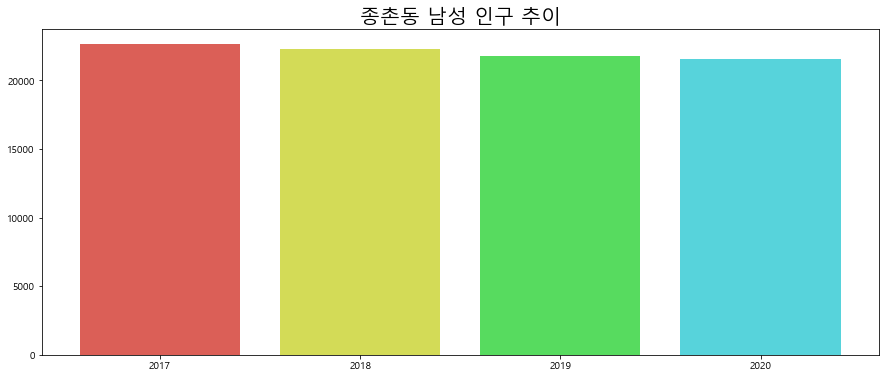

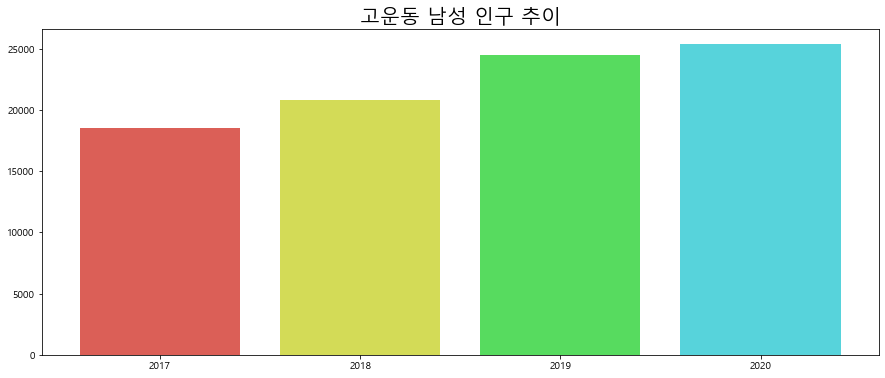

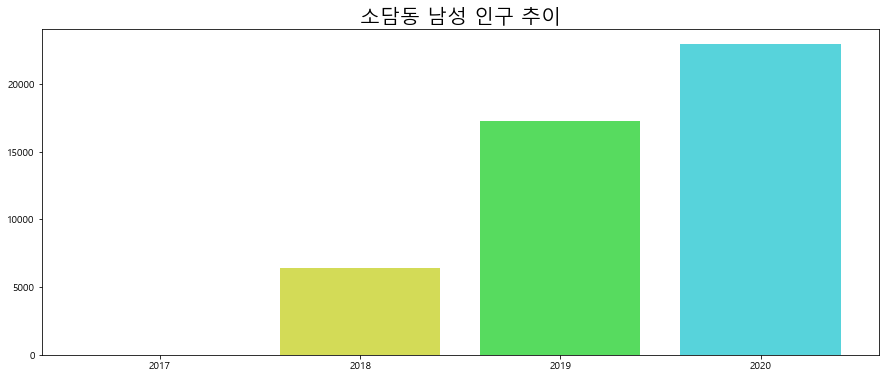

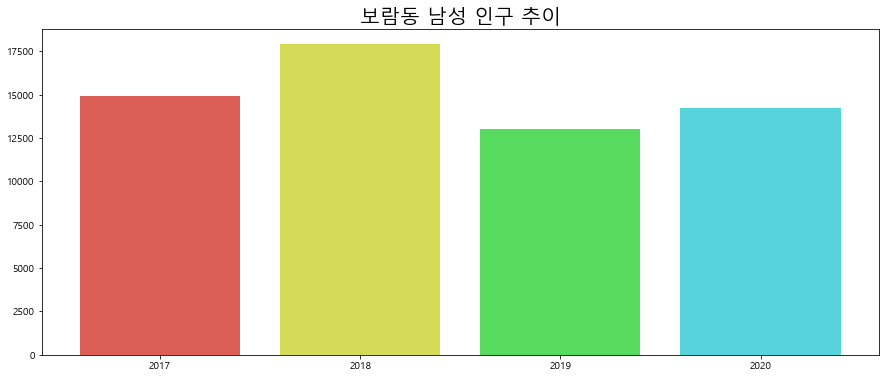

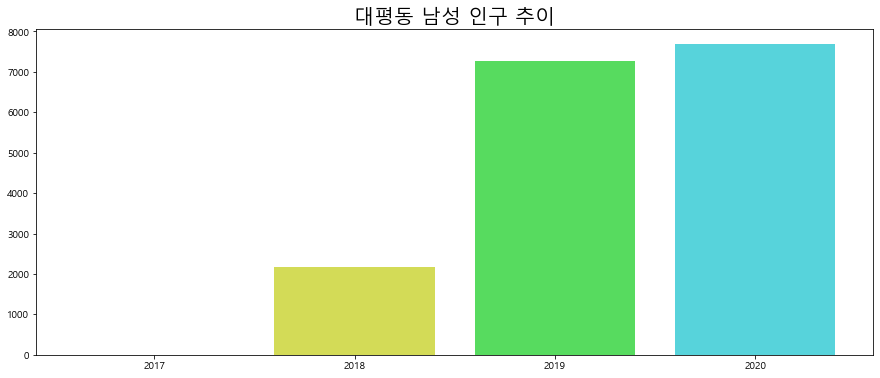

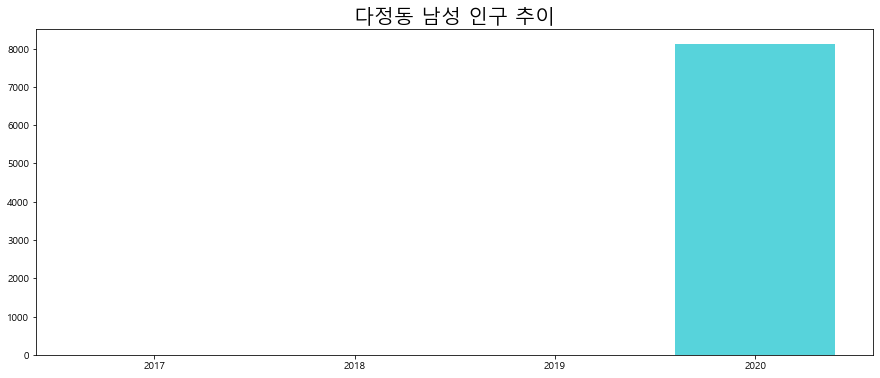

In [21]:
loc_list = ['세종특별자치시', '조치원읍', '연기면', '연동면', '부강면', '금남면', '장군면', '연서면', '전의면',
            '전동면', '소정면', '한솔동', '새롬동', '도담동', '아름동', '종촌동', '고운동', '소담동', '보람동',
            '대평동', '다정동']

for i,v in enumerate(loc_list):
    plt.figure(figsize=(15,6))
    colors = sns.color_palette('hls')
    plt.bar(df_m['index'],df_m[v],label='전입자수',color=colors)
    plt.xticks(df_m['index'],range(2017,2021))
#     plt.legend()
    plt.title('{} 남성 인구 추이'.format(v),fontsize=20)
    plt.show()

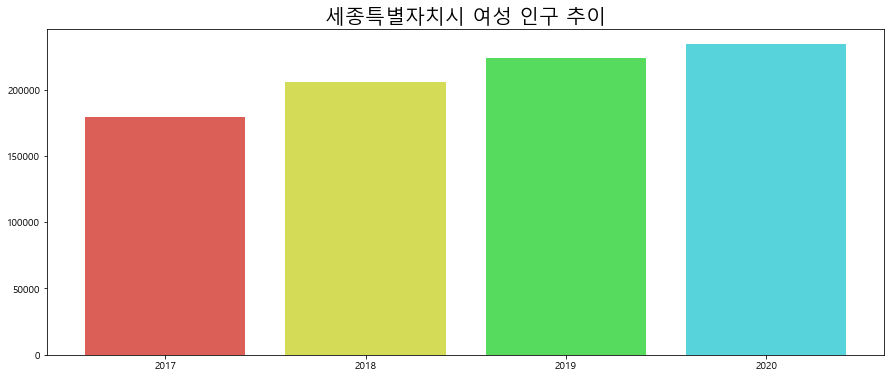

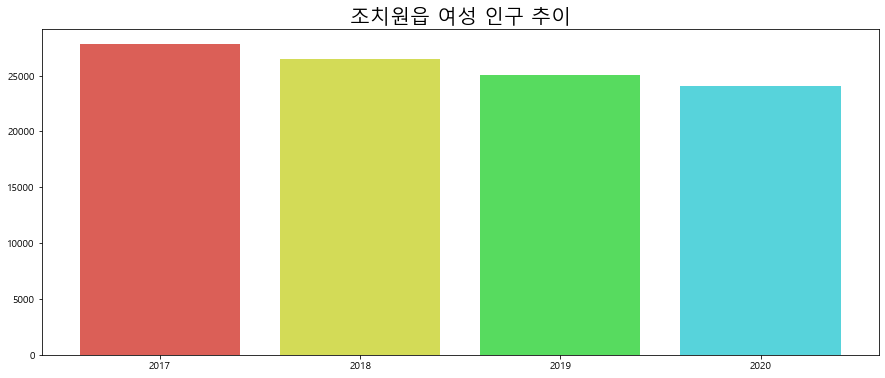

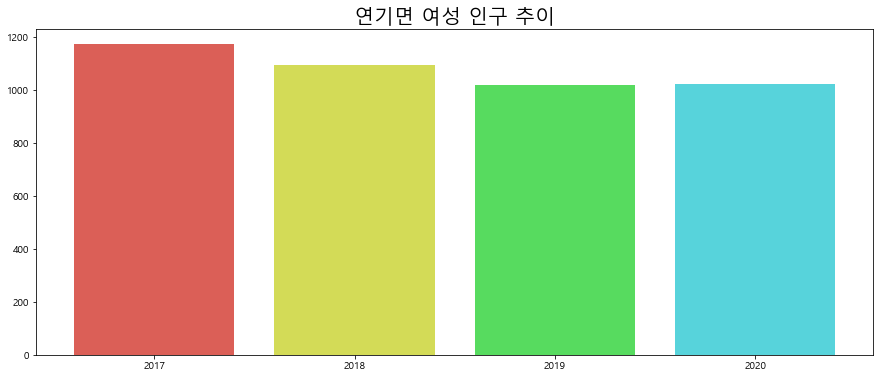

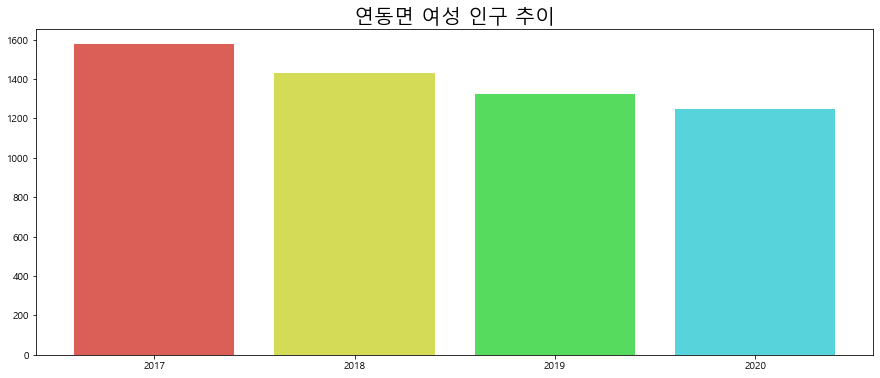

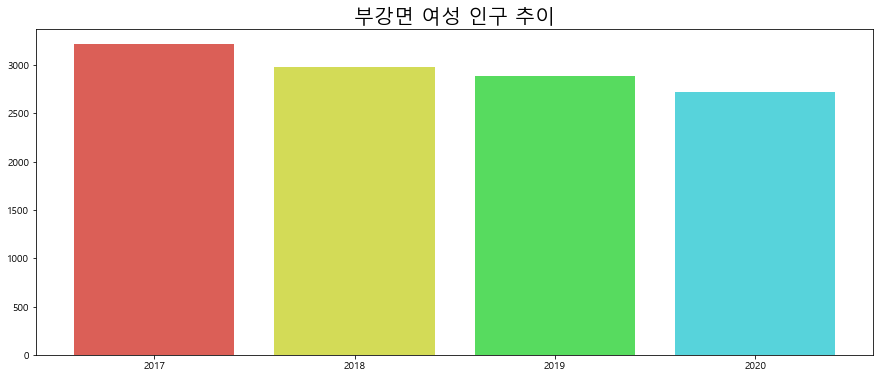

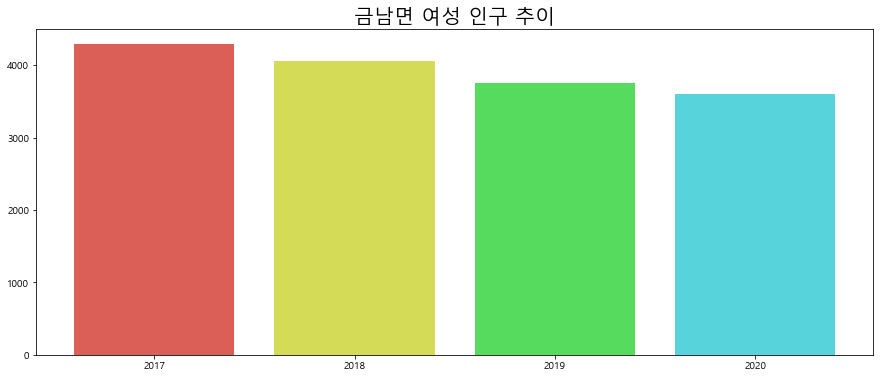

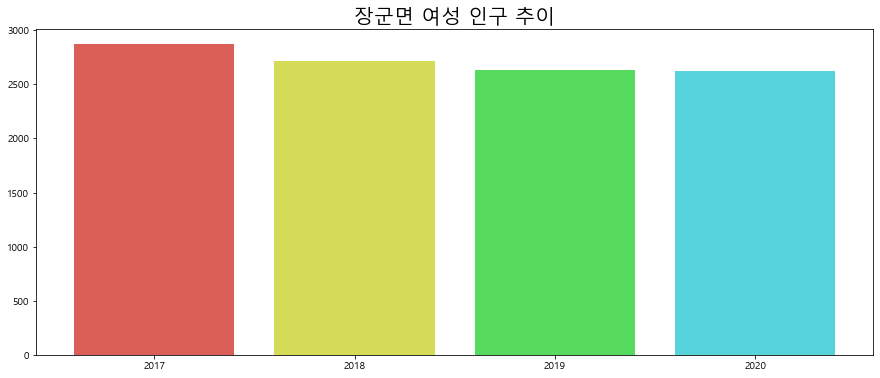

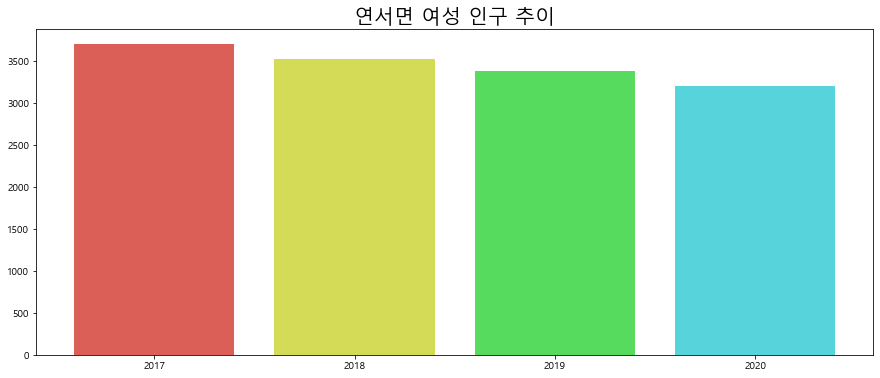

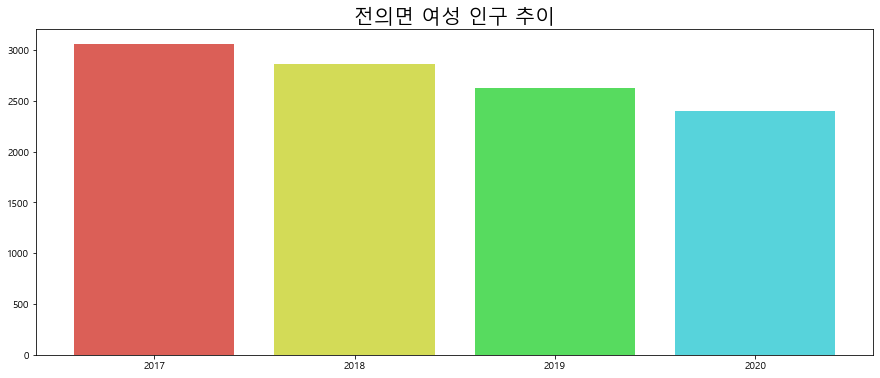

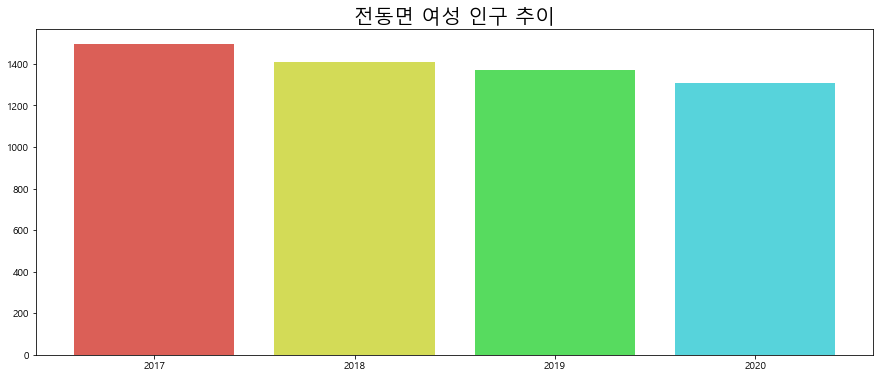

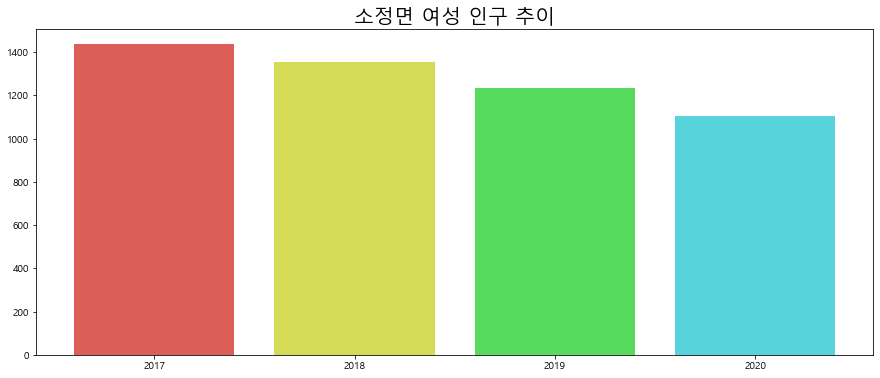

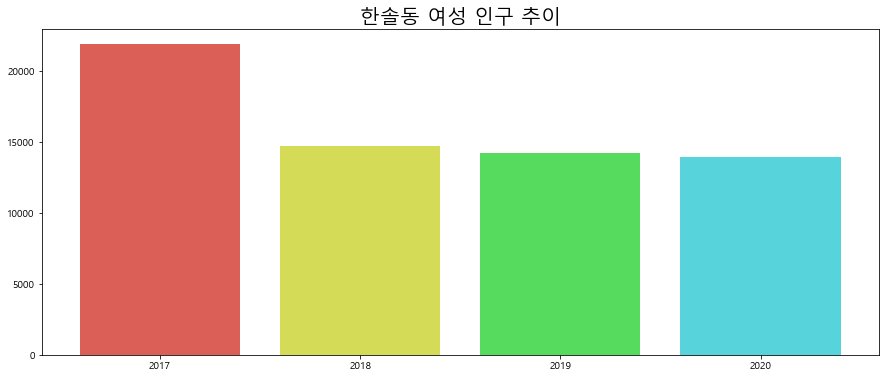

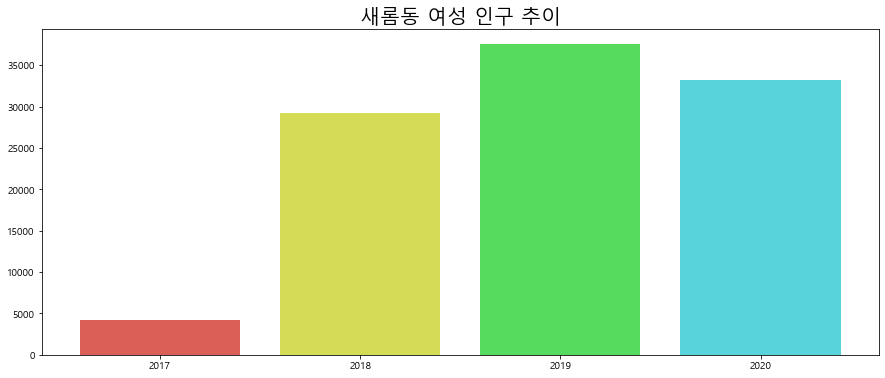

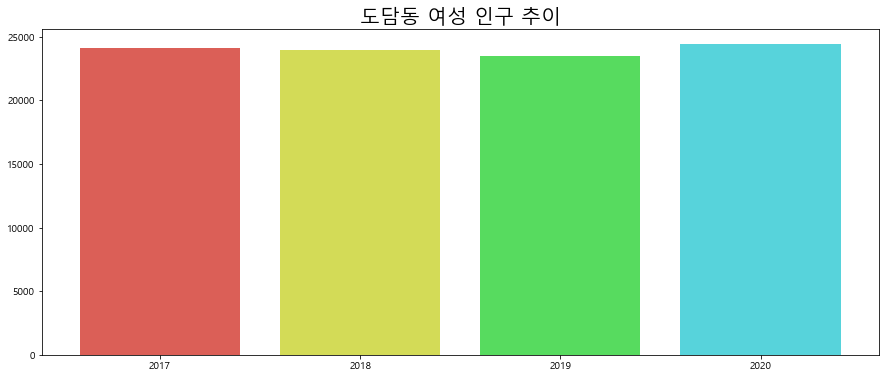

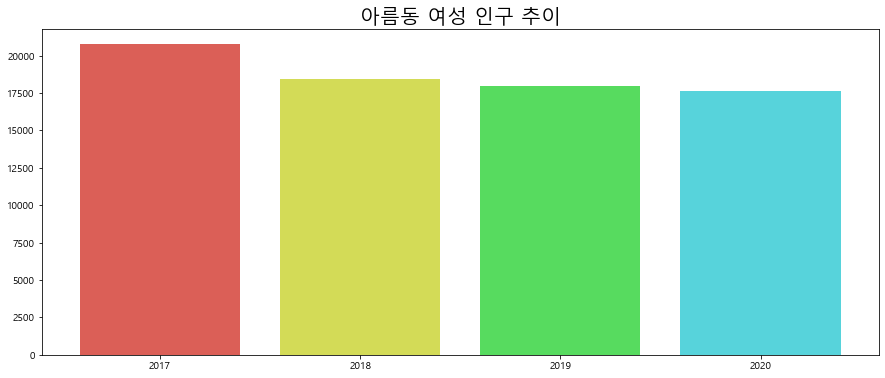

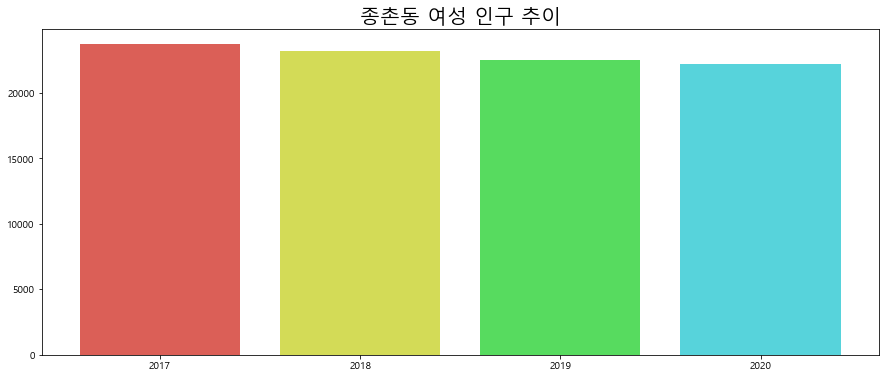

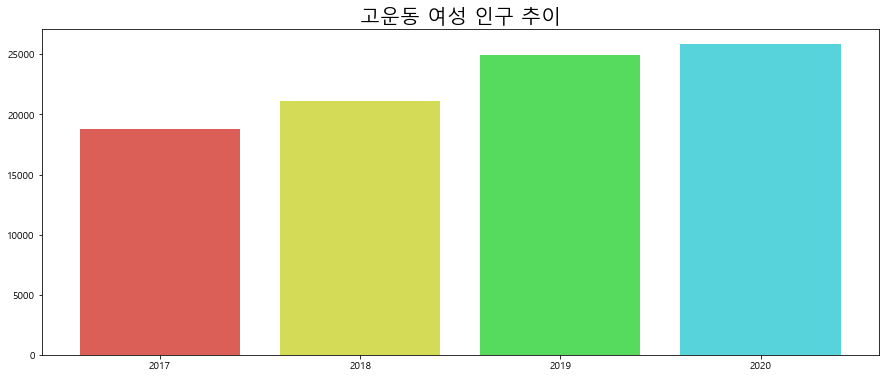

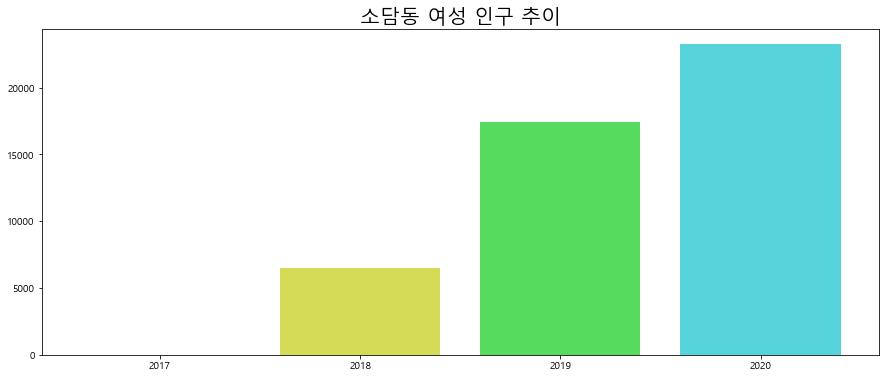

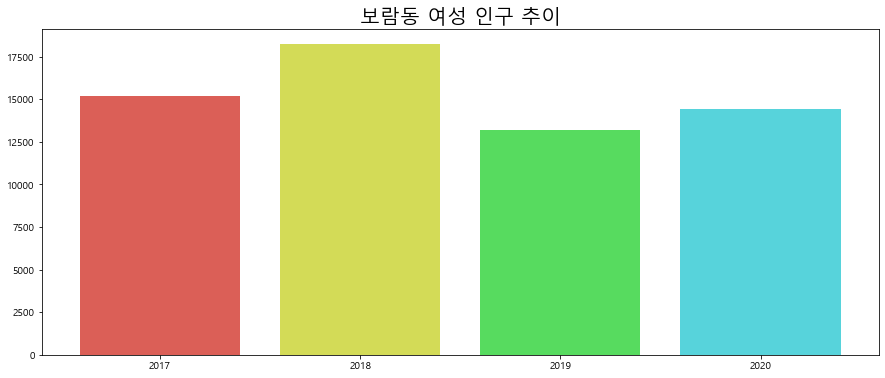

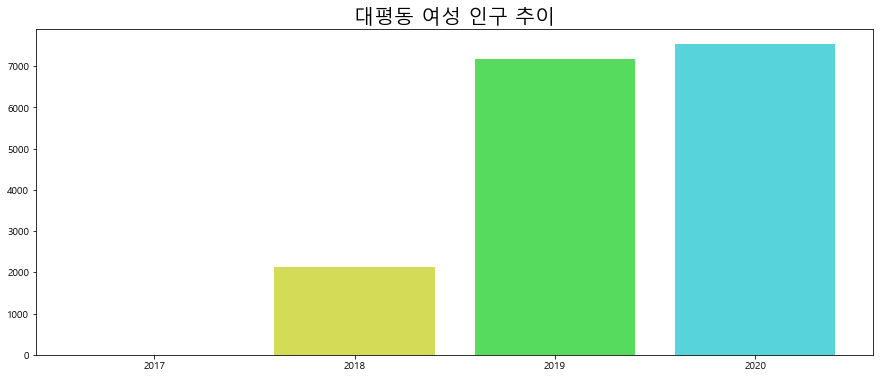

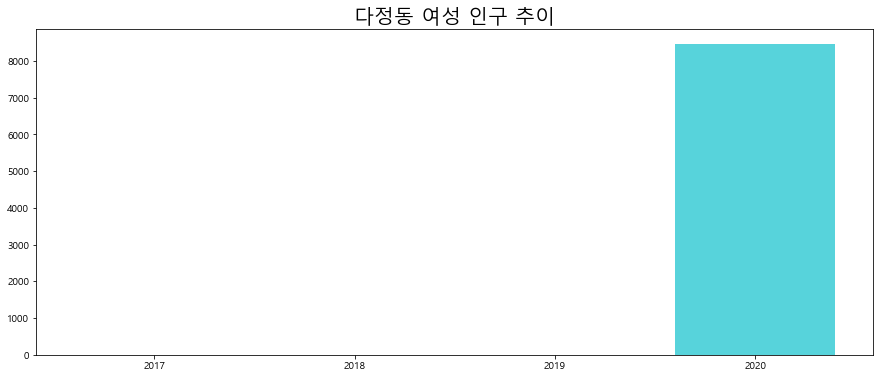

In [22]:
loc_list = ['세종특별자치시', '조치원읍', '연기면', '연동면', '부강면', '금남면', '장군면', '연서면', '전의면',
            '전동면', '소정면', '한솔동', '새롬동', '도담동', '아름동', '종촌동', '고운동', '소담동', '보람동',
            '대평동', '다정동']

for i,v in enumerate(loc_list):
    plt.figure(figsize=(15,6))
    colors = sns.color_palette('hls')
    plt.bar(df_w['index'],df_w[v],label='전입자수',color=colors)
    plt.xticks(df_w['index'],range(2017,2021))
#     plt.legend()
    plt.title('{} 여성 인구 추이'.format(v),fontsize=20)
    plt.show()

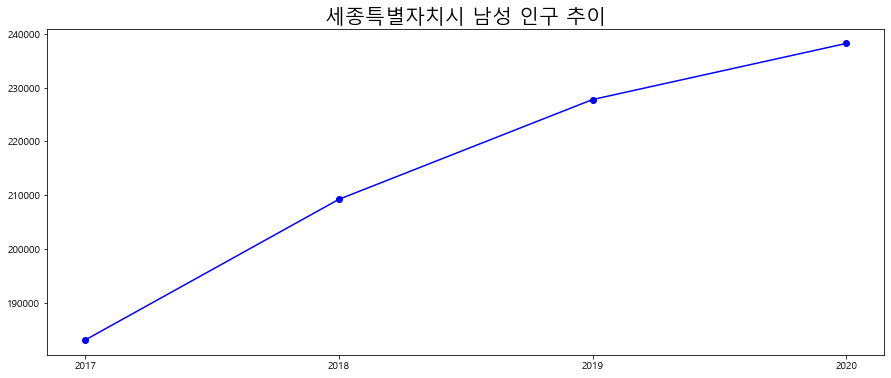

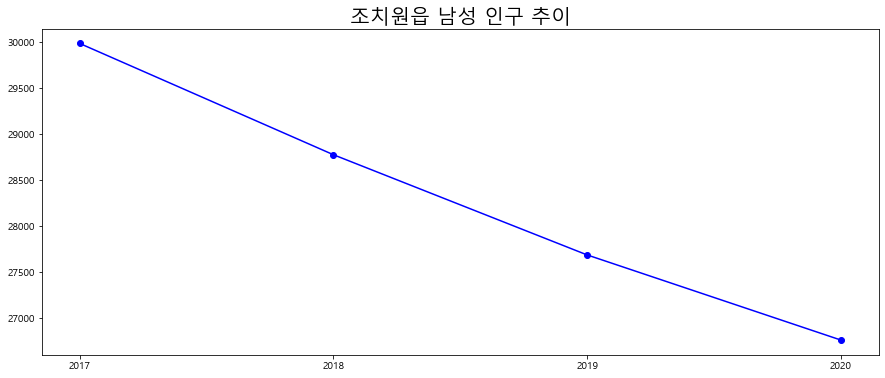

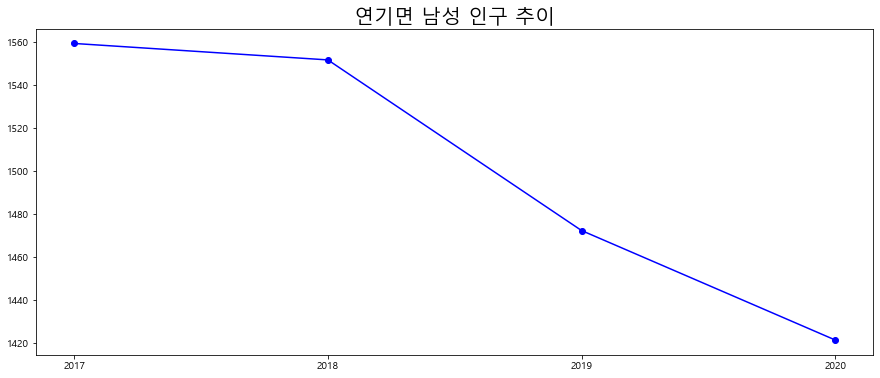

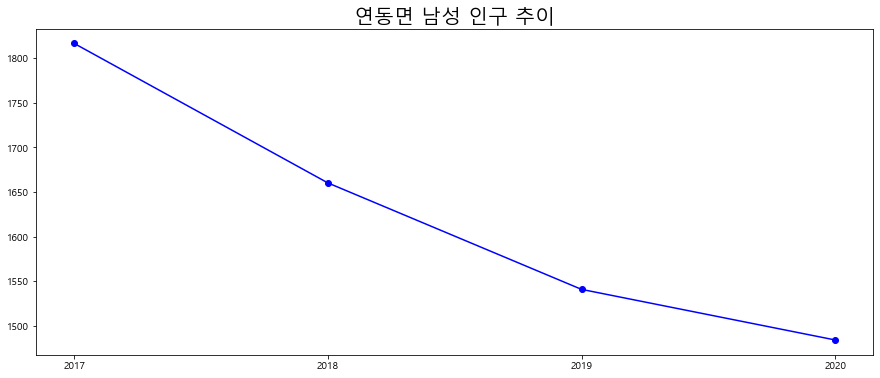

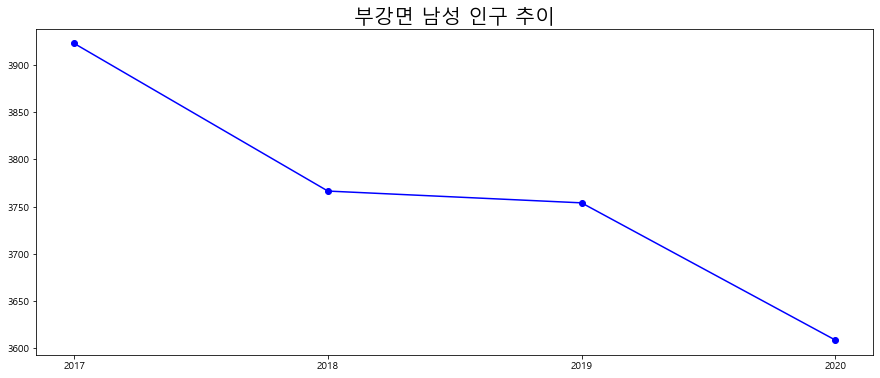

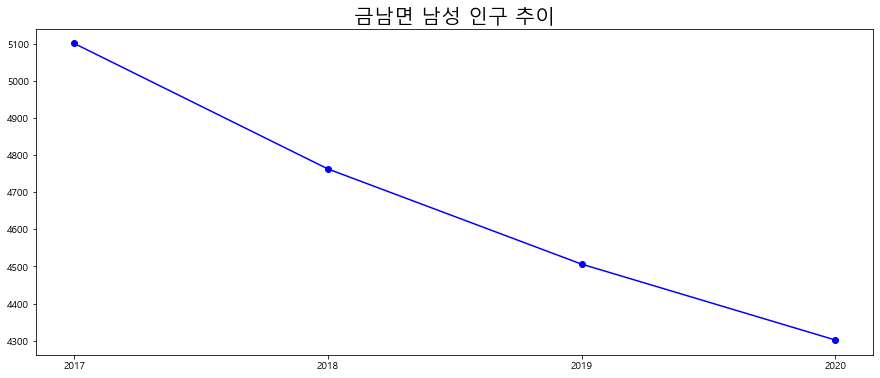

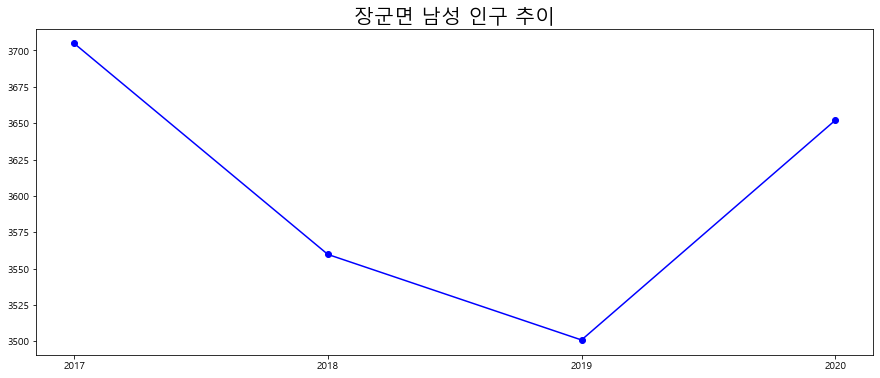

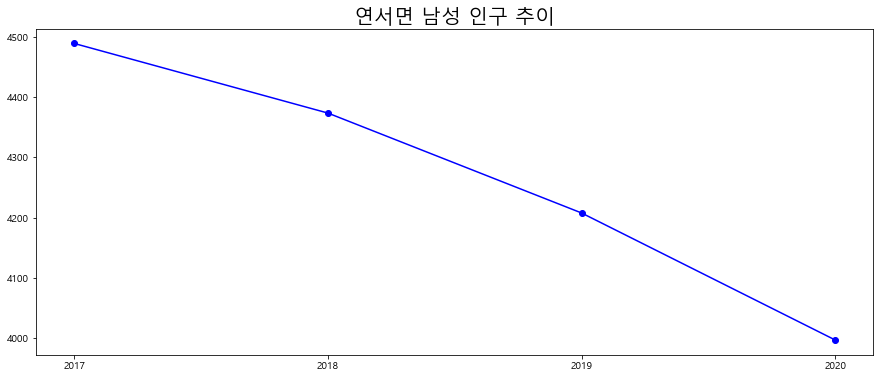

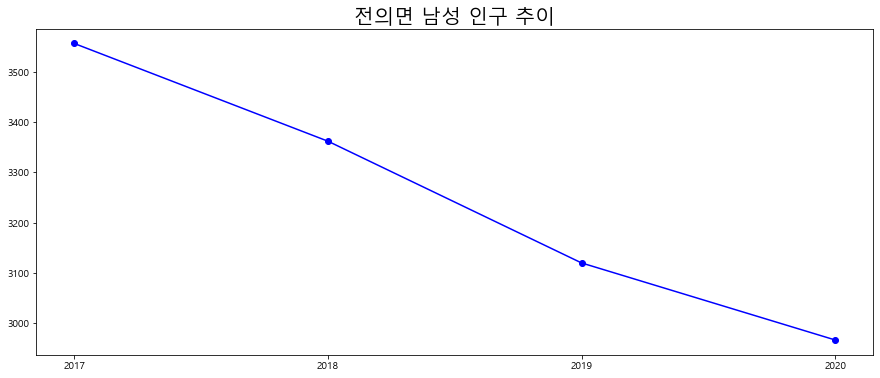

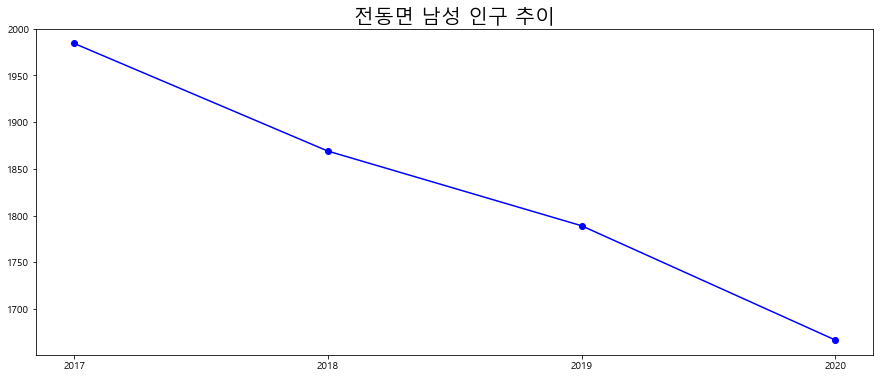

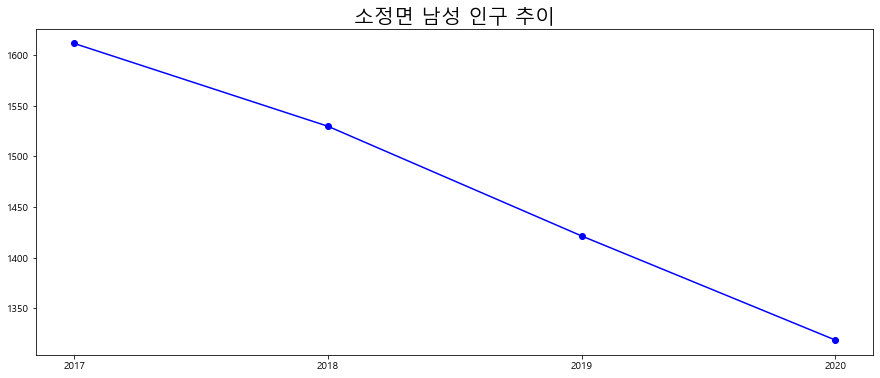

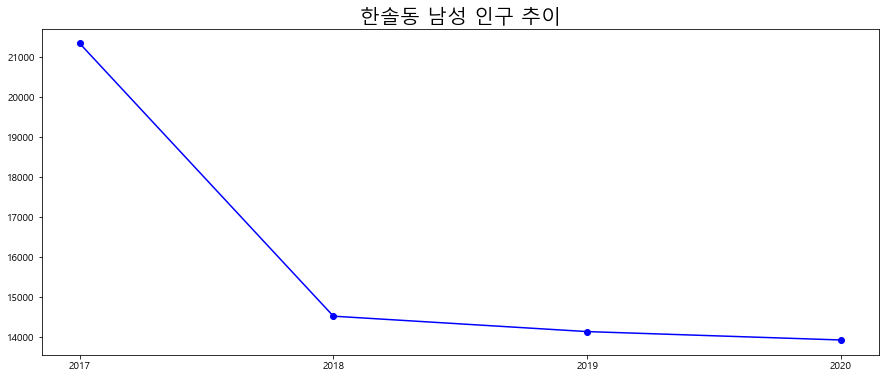

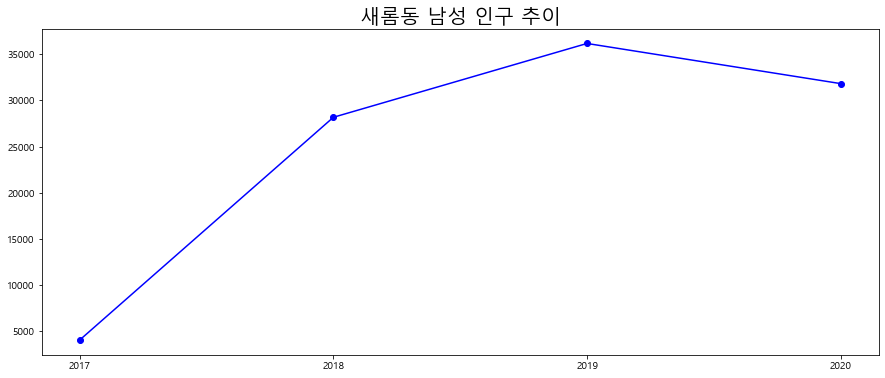

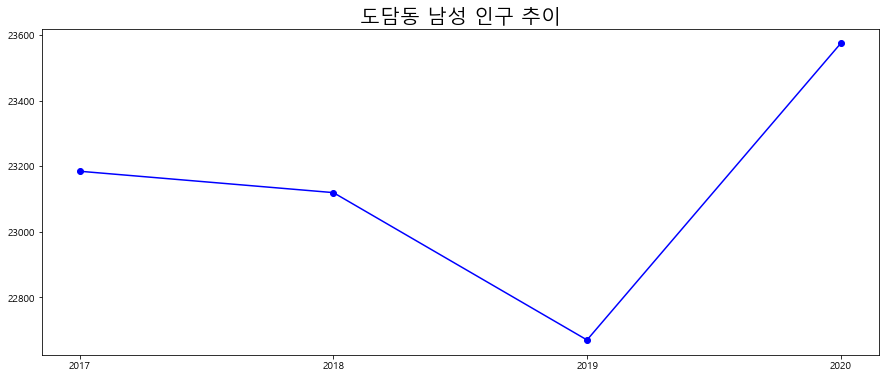

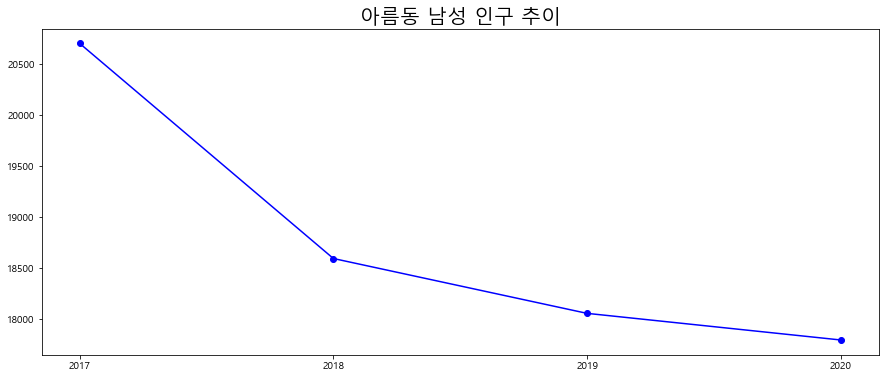

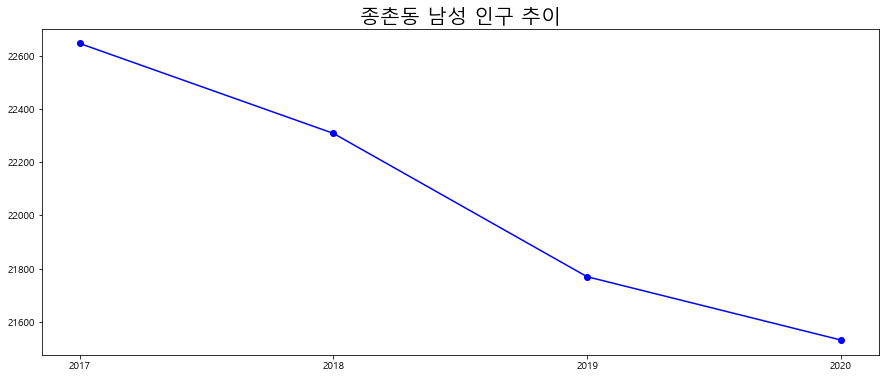

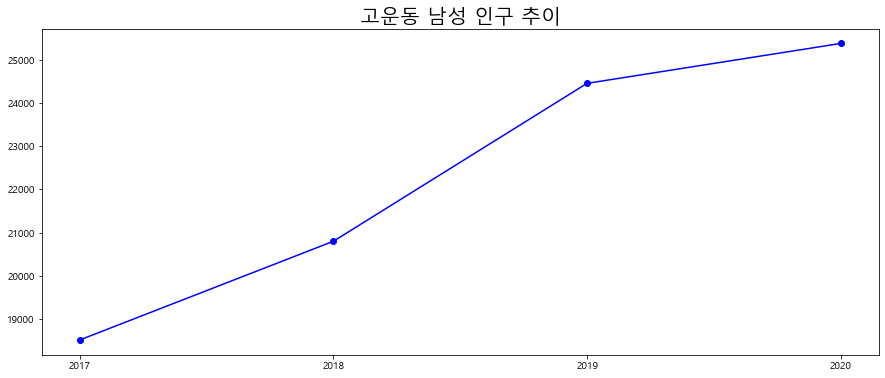

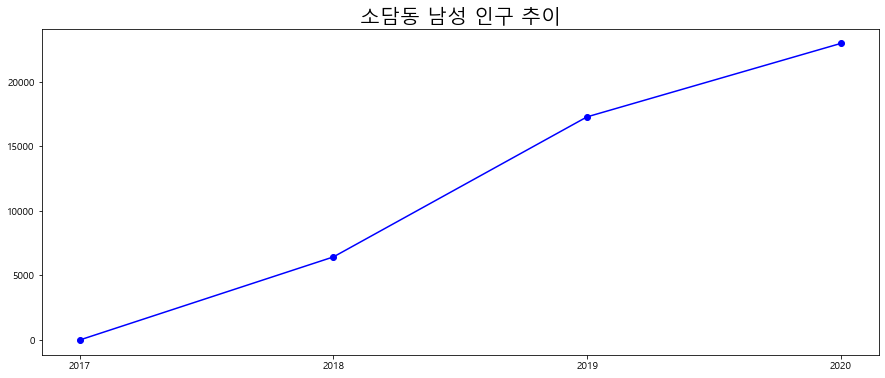

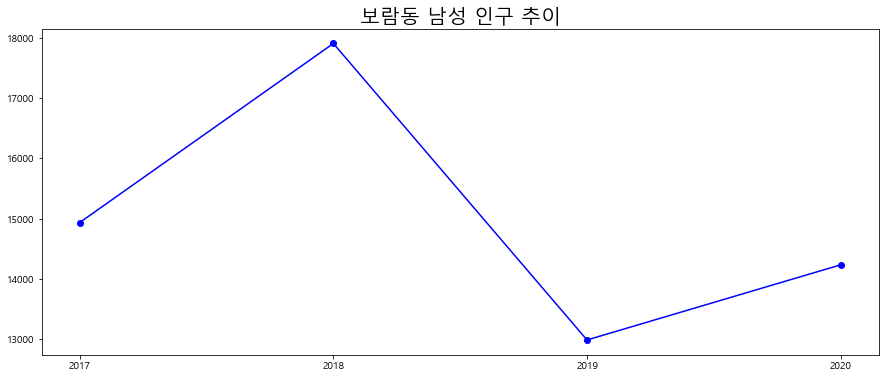

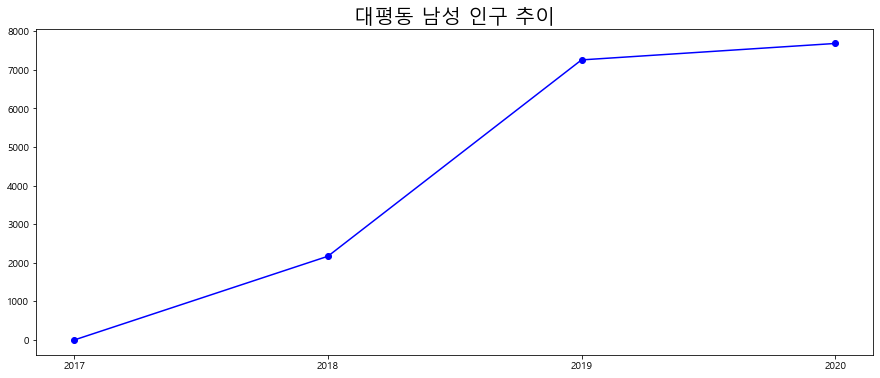

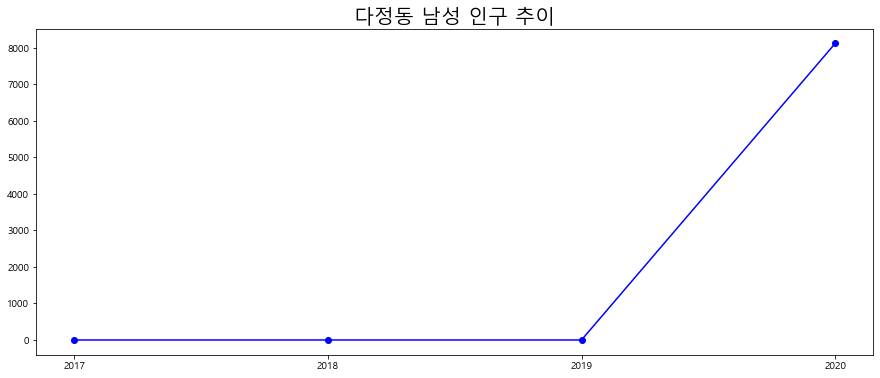

In [23]:
loc_list = ['세종특별자치시', '조치원읍', '연기면', '연동면', '부강면', '금남면', '장군면', '연서면', '전의면',
            '전동면', '소정면', '한솔동', '새롬동', '도담동', '아름동', '종촌동', '고운동', '소담동', '보람동',
            '대평동', '다정동']
#추세선
for i,v in enumerate(loc_list):
    plt.figure(figsize=(15,6))
    plt.plot(df_m['index'],df_m[v],label='전입자수',color='b',marker='o')
    plt.xticks(df_m['index'],range(2017,2021))
#     plt.legend()
    plt.title('{} 남성 인구 추이'.format(v),fontsize=20)
    plt.show()

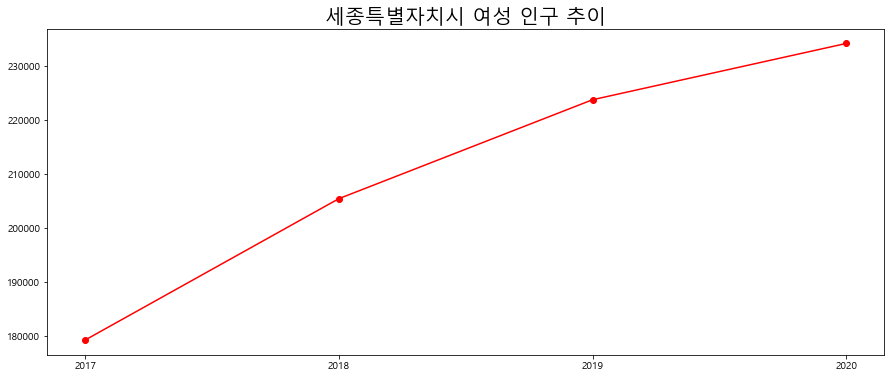

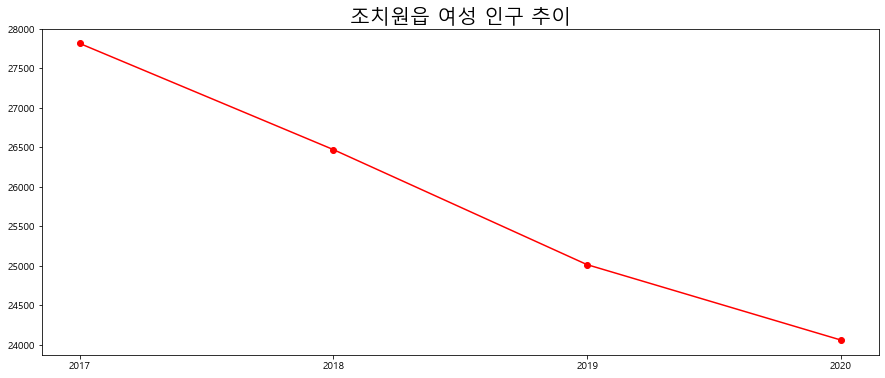

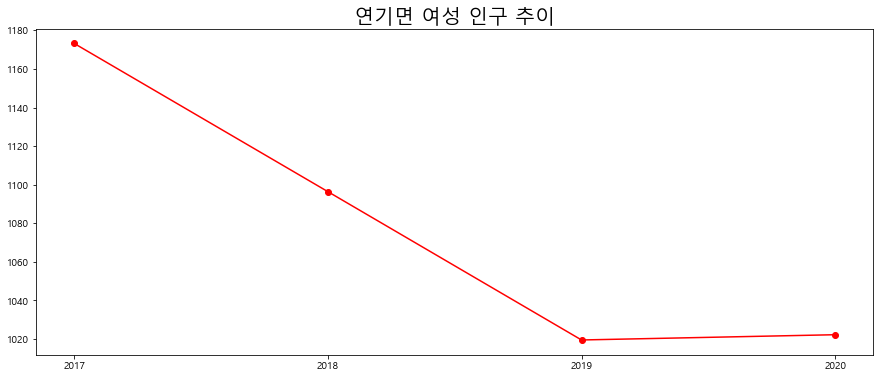

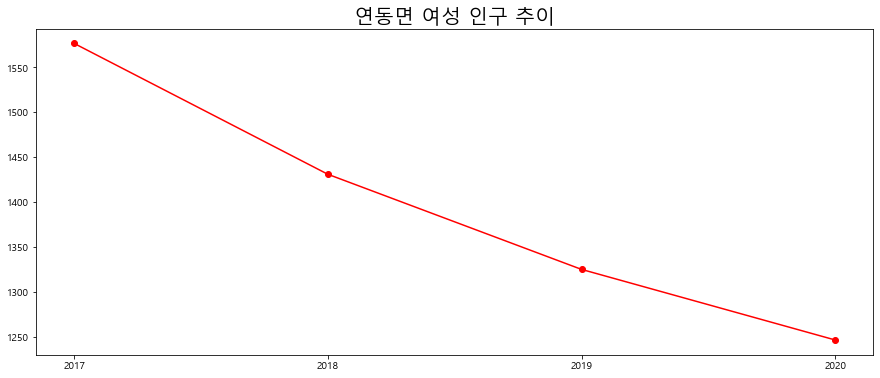

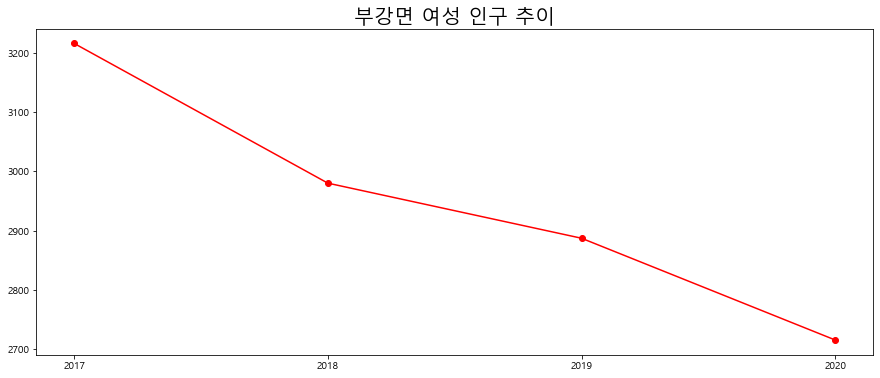

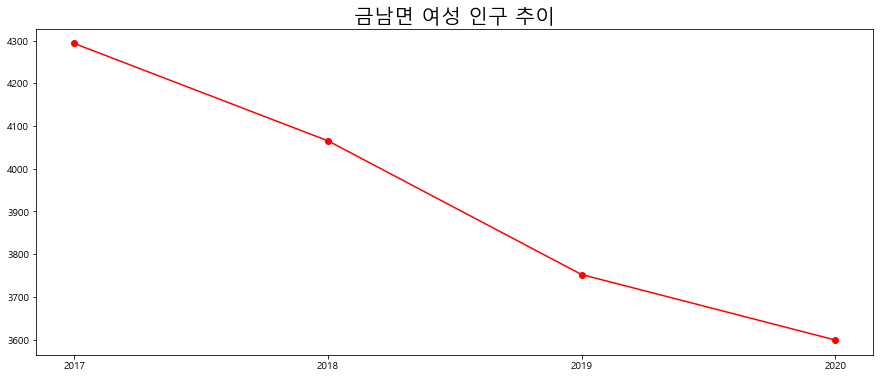

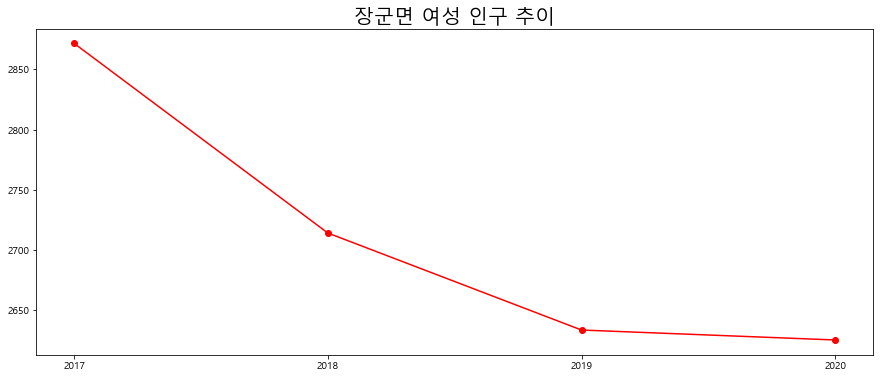

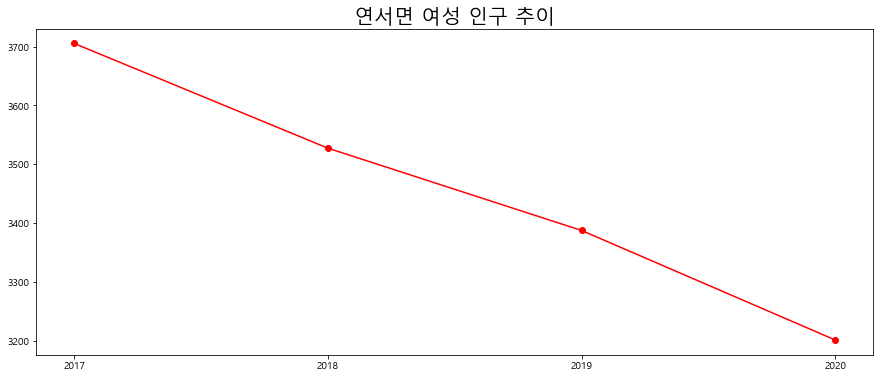

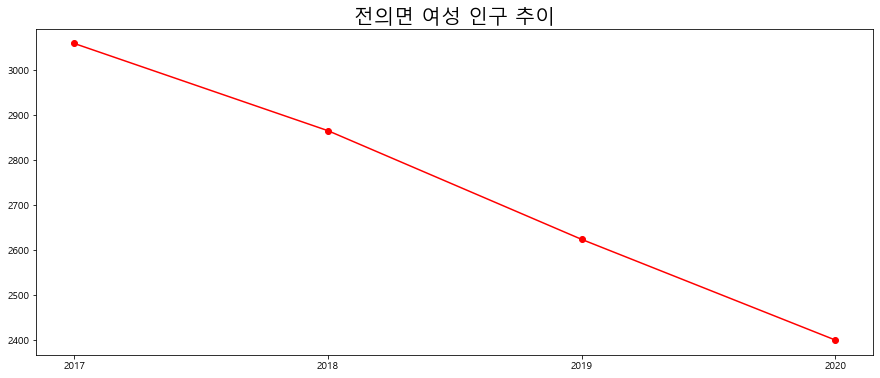

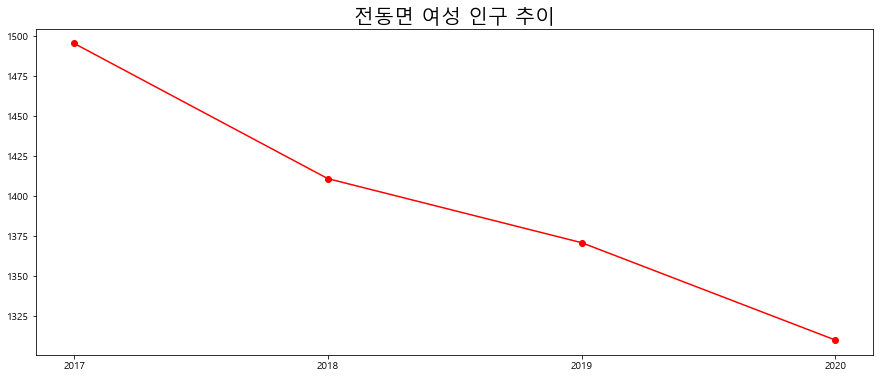

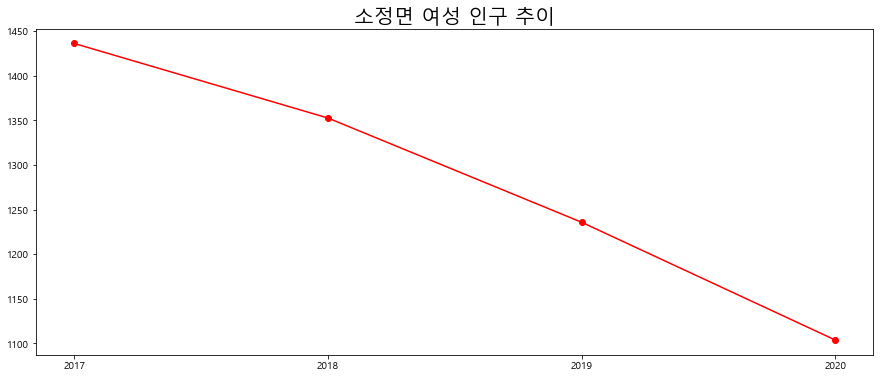

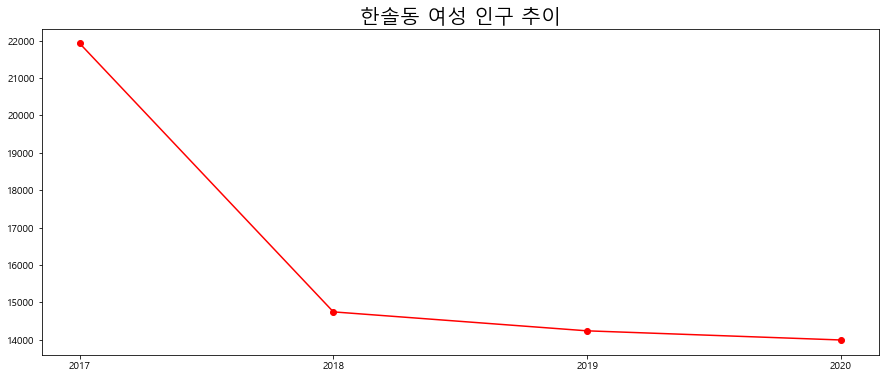

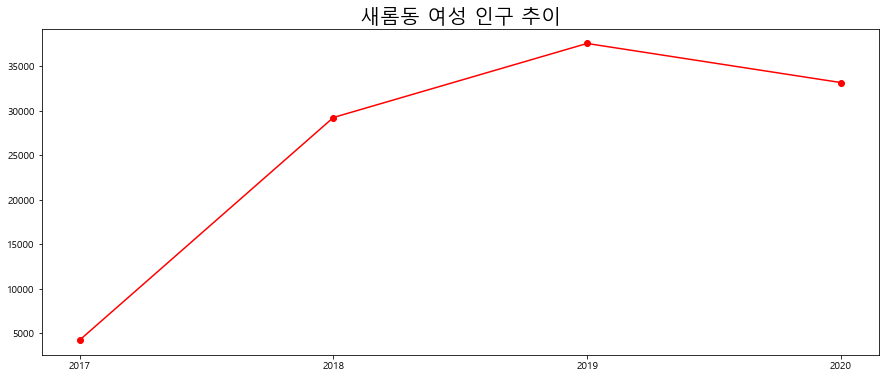

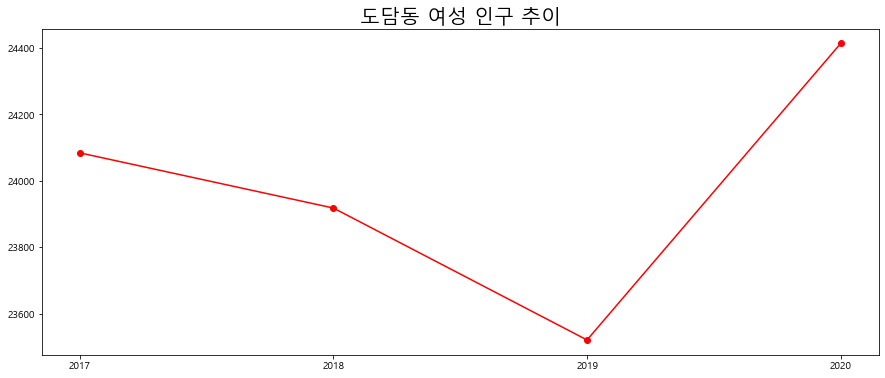

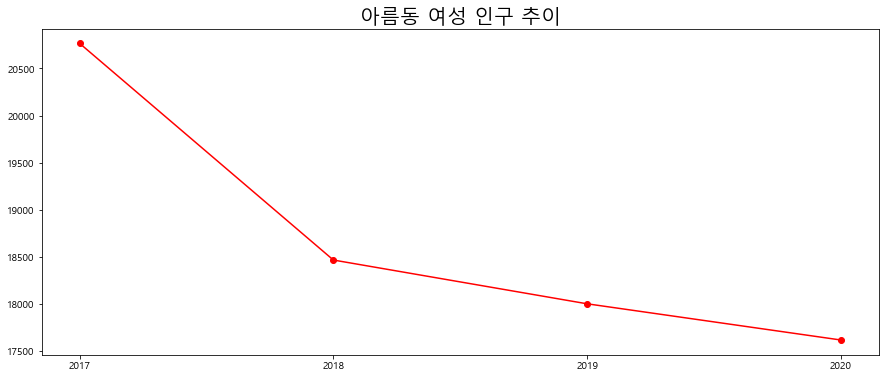

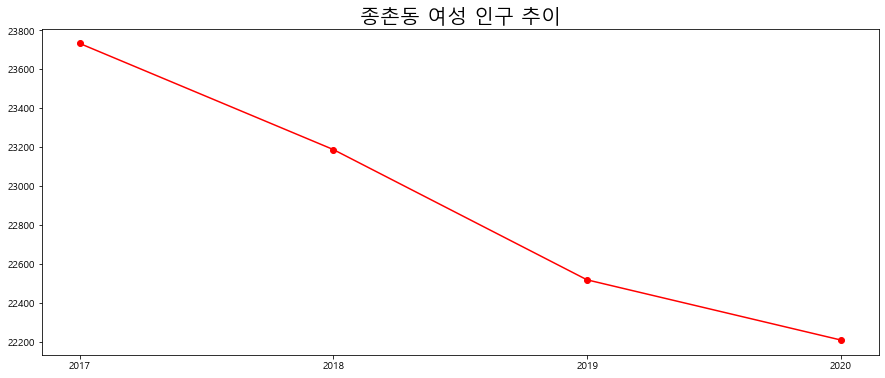

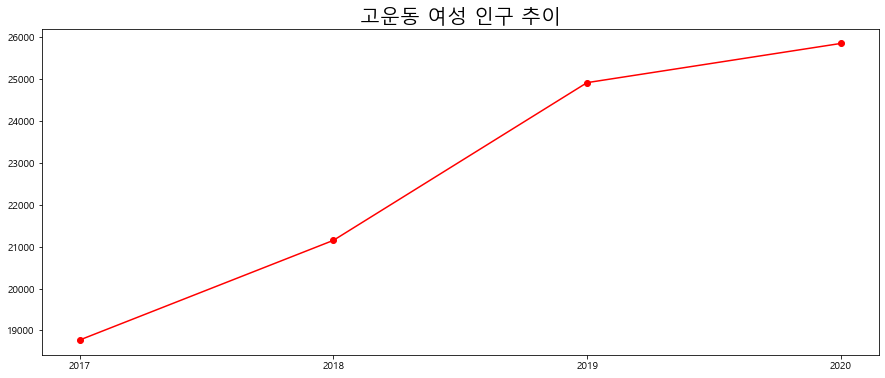

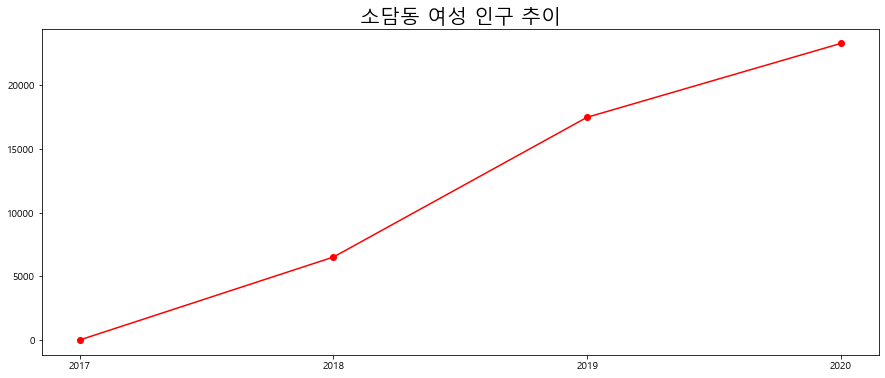

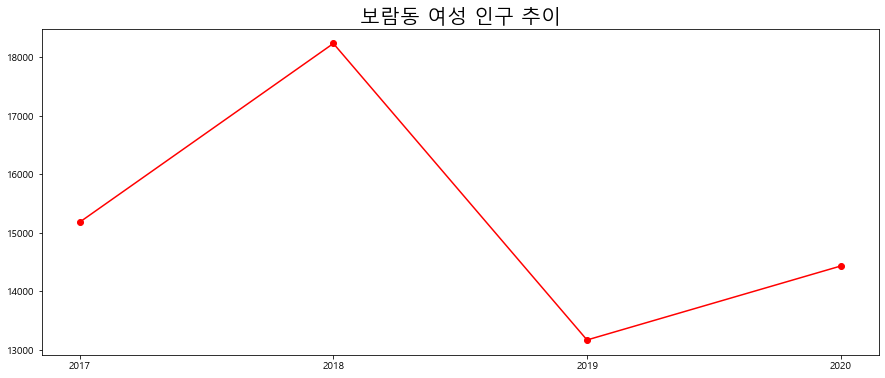

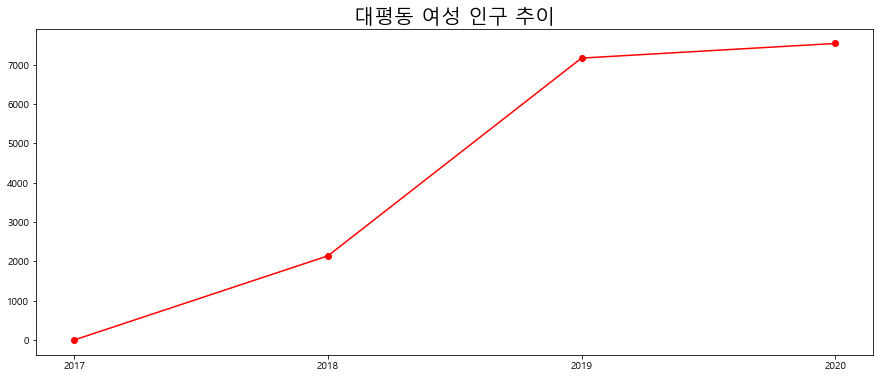

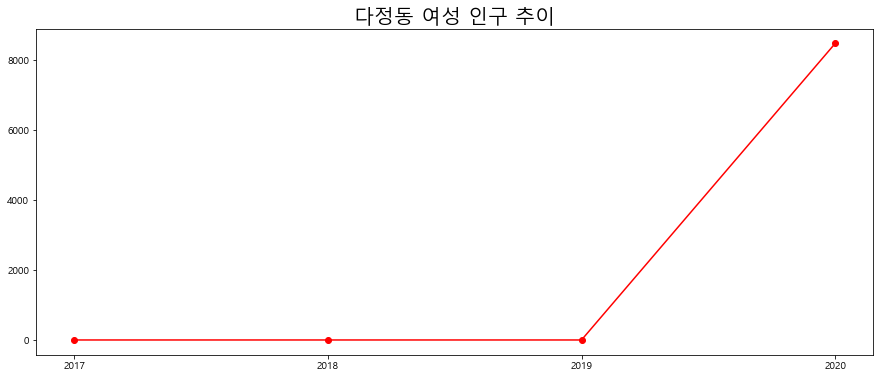

In [24]:
loc_list = ['세종특별자치시', '조치원읍', '연기면', '연동면', '부강면', '금남면', '장군면', '연서면', '전의면',
            '전동면', '소정면', '한솔동', '새롬동', '도담동', '아름동', '종촌동', '고운동', '소담동', '보람동',
            '대평동', '다정동']
#추세선
for i,v in enumerate(loc_list):
    plt.figure(figsize=(15,6))
    plt.plot(df_w['index'],df_w[v],label='전입자수',color='r',marker='o')
    plt.xticks(df_w['index'],range(2017,2021))
#     plt.legend()
    plt.title('{} 여성 인구 추이'.format(v),fontsize=20)
    plt.show()